In [ ]:
# pip install pyarrow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# importing necessary libraries

import pandas as pd
import numpy as np
import pyarrow.parquet as pq
import glob

### Loading necessary files

In [ ]:
# Collecting all the file paths in the directory
file_paths = glob.glob("yellow_tripdata_2022-*.parquet")

In [ ]:
file_paths

['yellow_tripdata_2022-05.parquet',
 'yellow_tripdata_2022-03.parquet',
 'yellow_tripdata_2022-04.parquet',
 'yellow_tripdata_2022-06.parquet',
 'yellow_tripdata_2022-02.parquet',
 'yellow_tripdata_2022-07.parquet',
 'yellow_tripdata_2022-12.parquet',
 'yellow_tripdata_2022-10.parquet',
 'yellow_tripdata_2022-08.parquet',
 'yellow_tripdata_2022-09.parquet',
 'yellow_tripdata_2022-01.parquet',
 'yellow_tripdata_2022-11.parquet']

In [ ]:
# Function to convert the object type columns to categorical values to reduce the space
def conv_catg(dataframe):
    for col in ['VendorID','passenger_count','store_and_fwd_flag','RatecodeID','payment_type','PULocationID','DOLocationID','airport_fee']:
        dataframe[col] = dataframe[col].astype('category')

In [ ]:
# Code to reduce the size of the dataframe to make efficient use of RAM
# Code obtained from: https://towardsdatascience.com/how-to-work-with-million-row-datasets-like-a-pro-76fb5c381cdd
def reduce_memory_usage(df, verbose=True):
    numerics = ["int8", "int16", "int32", "int64", "float16", "float32", "float64"]
    start_mem = df.memory_usage().sum() / 1024 ** 2
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == "int":
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if (
                    c_min > np.finfo(np.float16).min
                    and c_max < np.finfo(np.float16).max
                ):
                    df[col] = df[col].astype(np.float16)
                elif (
                    c_min > np.finfo(np.float32).min
                    and c_max < np.finfo(np.float32).max
                ):
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
    end_mem = df.memory_usage().sum() / 1024 ** 2
    if verbose:
        print(
            "Mem. usage decreased to {:.2f} Mb ({:.1f}% reduction)".format(
                end_mem, 100 * (start_mem - end_mem) / start_mem
            )
        )
    return df

In [ ]:
# Function to read the parquet files into a dataframe
def reading_data(file_name):
    var = pq.read_table('/content/'+file_name).to_pandas()
    conv_catg(var)
    var = reduce_memory_usage(var)
    return var

In [ ]:
# Reading in all the files and assigning a name automatically
for i in range(len(file_paths)):
    df_name = f"df_2022_{file_paths[i][21:23]}"
    globals()[df_name] = reading_data(file_paths[i])

Mem. usage decreased to 157.44 Mb (53.1% reduction)
Mem. usage decreased to 159.17 Mb (53.1% reduction)
Mem. usage decreased to 157.95 Mb (53.1% reduction)
Mem. usage decreased to 169.69 Mb (49.0% reduction)
Mem. usage decreased to 130.73 Mb (53.1% reduction)
Mem. usage decreased to 139.28 Mb (53.1% reduction)
Mem. usage decreased to 162.12 Mb (49.0% reduction)
Mem. usage decreased to 161.26 Mb (53.1% reduction)
Mem. usage decreased to 138.33 Mb (53.1% reduction)
Mem. usage decreased to 151.84 Mb (49.0% reduction)
Mem. usage decreased to 117.51 Mb (49.0% reduction)
Mem. usage decreased to 142.71 Mb (53.1% reduction)


In [ ]:
df_2022_01.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.80,1.0,N,142,236,1,14.5,3.0,0.5,3.650391,0.0,0.300049,21.950001,2.5,0.0
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.10,1.0,N,236,42,1,8.0,0.5,0.5,4.000000,0.0,0.300049,13.300000,0.0,0.0
2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,0.97,1.0,N,166,166,1,7.5,0.5,0.5,1.759766,0.0,0.300049,10.560000,0.0,0.0
3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.0,1.09,1.0,N,114,68,2,8.0,0.5,0.5,0.000000,0.0,0.300049,11.800000,2.5,0.0
4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.0,4.30,1.0,N,68,163,1,23.5,0.5,0.5,3.000000,0.0,0.300049,30.299999,2.5,0.0


In [ ]:
# Merging all the files for each month together in a dataframe
df_taxi_final = pd.concat([df_2022_01,df_2022_02,df_2022_03,df_2022_04,df_2022_05,df_2022_06,df_2022_07,df_2022_08,df_2022_09,df_2022_10,df_2022_11,df_2022_12],ignore_index=True,sort=False)

In [ ]:
# Shape of the merged dataset
df_taxi_final.shape

(39656098, 19)

In [ ]:
# Checking for null values in data
df_taxi_final.isnull().sum()

VendorID                       0
tpep_pickup_datetime           0
tpep_dropoff_datetime          0
passenger_count          1368303
trip_distance                  0
RatecodeID               1368303
store_and_fwd_flag       1368303
PULocationID                   0
DOLocationID                   0
payment_type                   0
fare_amount                    0
extra                          0
mta_tax                        0
tip_amount                     0
tolls_amount                   0
improvement_surcharge          0
total_amount                   0
congestion_surcharge     1368303
airport_fee              1368303
dtype: int64

In [ ]:
# Dropping the null values
df_taxi_final.dropna(inplace=True)

### Checking what are the unique values present in the categorical variables

In [ ]:
df_taxi_final['VendorID'].unique()

array([1, 2])

In [ ]:
df_taxi_final['passenger_count'].unique()

/usr/local/lib/python3.9/dist-packages/IPython/lib/pretty.py:700: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  output = repr(obj)


[2.0, 1.0, 3.0, 4.0, 5.0, 6.0, 0.0, 7.0, 8.0, 9.0]
Categories (10, float64): [0.0, 1.0, 2.0, 3.0, ..., 6.0, 7.0, 8.0, 9.0]

In [ ]:
df_taxi_final['RatecodeID'].unique()

[1.0, 2.0, 5.0, 3.0, 4.0, 99.0, 6.0]
Categories (7, float64): [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 99.0]

In [ ]:
df_taxi_final['store_and_fwd_flag'].unique()

['N', 'Y']
Categories (2, object): ['N', 'Y']

In [ ]:
df_taxi_final['PULocationID'].unique()

array([142, 236, 166, 114,  68, 138, 233, 238, 141, 234, 246,  43, 239,
       148, 237,   7, 107, 263, 161,  79, 170, 162,   4, 262, 249, 132,
       137,  90,  45,  70,  48, 211, 113, 164,  50, 265,  88, 186, 144,
       224,  95,  24, 158,  74, 140, 163,  75, 229, 209, 264, 219, 232,
       151, 256, 231,  87, 116,  65, 188,  42,  13,  33,  41, 220, 146,
       100, 261, 125, 152, 127, 143, 243,  66, 260, 181, 195, 112, 129,
        10, 226,  25, 255, 244,  12, 168, 230, 189,  97,  82, 190,  52,
        49,  61, 145, 223, 202, 228, 179,  36,  40, 159,  80,  17, 167,
       208,  69, 254, 213, 193,  77,  37, 225, 171, 106,  93, 247, 165,
       117, 212, 250,  14, 157, 198,  83, 169, 136, 217, 173, 123, 160,
         3,   1,  76,  89,  22,  39,  86,  18,  28, 252, 227, 135,  91,
       124,  38, 216, 119, 205,  81, 122, 194,  92, 133,  35, 134, 177,
       215, 147, 248,  63,  47, 210, 197, 201, 131, 200,  56,   5, 130,
       191,  85, 218,  51,  46, 149, 241, 139, 235,  71, 102,  6

In [ ]:
df_taxi_final['DOLocationID'].unique()

array([236,  42, 166,  68, 163, 161,  87, 152, 141, 229,  90, 113,  79,
       140, 151, 107,   7, 263,  43,  24, 233, 238,  48, 237, 249, 186,
        92, 262, 170,  74,  10, 112,   4,  45, 148,  47, 142, 137, 261,
       246,  41,  36, 239, 168, 243,  61, 153, 231, 139, 265, 114,  97,
       255, 211, 164, 180, 144, 256,  13, 134, 143, 196, 125,  50, 162,
       234,  65, 181,  83,  40, 193, 130, 226, 202,  56,  70,  80,  17,
        85, 223, 241, 224, 179,  18, 244, 157, 189, 129,  33, 106, 158,
       232, 220, 116,  82,  25, 197, 169,  72,  88,  35,  49,  75, 177,
       160, 225, 213, 127, 264, 146,  89,  51, 257, 147, 100, 228,  39,
       145, 198,  37,  66,  63, 102, 173, 209, 260, 218, 132,   8, 188,
        86,  15,  69,  73, 219, 252,  71,  95,  26, 185, 149, 119, 248,
       217,  28,  52, 120, 138, 212, 216,  91, 133, 192, 117,  14,  67,
        76, 123,  32,  54, 136, 175, 159, 215, 222,  23, 178,  53, 230,
       121,  64,  60,  78,  16,  62, 200, 194,   9, 247, 210, 17

In [ ]:
df_taxi_final['payment_type'].unique()

array([1, 2, 4, 3, 5])

In [ ]:
df_taxi_final['airport_fee'].unique()

array([ 0.  ,  1.25, -1.25,  0.5 ])

In [ ]:
df_taxi_final['extra'].unique()

array([ 3.000e+00,  5.000e-01,  2.500e+00,  3.750e+00,  0.000e+00,
        1.750e+00, -5.000e-01,  4.250e+00,  1.250e+00,  1.000e+00,
        3.500e+00,  4.000e+00,  7.998e-01,  2.250e+00,  4.750e+00,
        1.300e+00,  2.949e+00, -1.000e+00,  8.250e+00,  4.500e+00,
        7.000e+00,  3.250e+00,  5.750e+00, -4.500e+00,  2.000e+00,
        5.500e+00,  1.425e+01,  6.000e+00,  2.900e-01,  1.375e+01,
        9.000e+00,  6.750e+00,  6.500e+00,  1.500e+00,  3.350e+01,
        9.500e+00,  3.850e+00,  5.000e+00,  3.301e+00,  9.998e-02,
        1.800e+00,  6.551e+00,  4.301e+00,  1.000e-02, -2.500e+00,
        5.801e+00, -2.000e+00,  1.250e+01,  1.150e+01,  1.400e+01,
        6.000e-02,  9.047e+00,  1.020e+00,  2.450e+01,  1.325e+01,
        6.250e+00,  1.030e+00,  3.000e-01,  7.801e+00,  7.500e-01,
        7.500e+00,  8.002e-02,  3.801e+00,  5.250e+00, -3.000e+00,
        5.301e+00, -3.500e+00,  4.551e+00,  1.010e+00,  7.001e-02,
        4.500e-01,  2.100e+00,  5.200e-01,  1.030e+01,  2.000e

In [ ]:
df_taxi_final['mta_tax'].unique()

array([ 0.5 , -0.5 ,  0.  ,  0.35, 16.6 ,  3.3 ,  0.08,  0.07,  0.1 ,
        2.5 , -0.07,  0.32,  2.8 ,  3.  ,  0.68,  0.05,  2.05, 17.1 ,
        0.12,  0.11,  0.25,  2.75,  0.26,  0.14,  2.78,  0.55,  0.6 ,
       -0.55,  0.09,  1.2 ,  2.54,  2.55, 25.48, 16.55,  0.8 ,  1.5 ,
        1.  ,  1.3 ,  0.3 ,  1.6 ,  4.  ,  2.  ,  5.25], dtype=float16)

In [ ]:
df_taxi_final['tolls_amount'].unique()

array([  0.  ,   6.55,   6.12, ...,   9.06,  30.03, 120.  ], dtype=float16)

In [ ]:
df_taxi_final['improvement_surcharge'].unique()

array([ 0.3, -0.3,  0. ,  1. , -1. ], dtype=float16)

In [ ]:
df_taxi_final['congestion_surcharge'].unique()

array([ 2.5 ,  0.  , -2.5 ,  0.75,  1.  , -0.75,  2.75,  1.8 ,  0.5 ,
        2.25], dtype=float16)

### Featuring Engineering new columns

In [ ]:
df_taxi_final['pickup_day'] = df_taxi_final['tpep_pickup_datetime'].dt.day_name()
df_taxi_final['dropoff_day'] = df_taxi_final['tpep_dropoff_datetime'].dt.day_name()

# df_taxi_final['pickup_day_no'] = df_taxi_final['tpep_pickup_datetime'].dt.weekday
# df_taxi_final['dropoff_day_no'] = df_taxi_final['tpep_dropoff_datetime'].dt.weekday

df_taxi_final['pickup_hour'] = df_taxi_final['tpep_pickup_datetime'].dt.hour
df_taxi_final['dropoff_hour'] = df_taxi_final['tpep_dropoff_datetime'].dt.hour

df_taxi_final['pickup_month'] = df_taxi_final['tpep_pickup_datetime'].dt.month
df_taxi_final['dropoff_month'] = df_taxi_final['tpep_dropoff_datetime'].dt.month

In [ ]:
df_taxi_final['pickup_mday'] = df_taxi_final['tpep_pickup_datetime'].dt.day
df_taxi_final['dropoff_mday'] = df_taxi_final['tpep_dropoff_datetime'].dt.day

In [ ]:
def time_of_day(x):
    if x in range(6,12):
        return 'Morning'
    elif x in range(12,16):
        return 'Afternoon'
    elif x in range(16,22):
        return 'Evening'
    else:
        return 'Late night'

In [ ]:
df_taxi_final['time_of_day_pickup'] = df_taxi_final['pickup_hour'].apply(time_of_day)
df_taxi_final['time_of_day_dropoff'] = df_taxi_final['dropoff_hour'].apply(time_of_day)

In [ ]:
df_taxi_final['duration'] = (df_taxi_final['tpep_dropoff_datetime']-df_taxi_final['tpep_pickup_datetime']).dt.total_seconds()

In [ ]:
# df_taxi_final.to_parquet('/content/taxi_data_final.parquet')

In [ ]:
# pip install fastparquet

In [ ]:
df_taxi_final.to_parquet('/content/taxi_data_final.parquet.gzip', engine='fastparquet', compression='gzip')

### Initial Univariate Analysis

In [ ]:
# ! gdown --id https://drive.google.com/file/d/12fPfaTaRxj_vAa605aiiuUlQnWruZIzq/view?usp=share_link

In [ ]:
# import pandas as pd

In [ ]:
df_taxi = pd.read_parquet("/content/taxi_data_final.parquet.gzip")

In [ ]:
df_taxi.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,dropoff_day,pickup_hour,dropoff_hour,pickup_month,dropoff_month,pickup_mday,dropoff_mday,time_of_day_pickup,time_of_day_dropoff,duration
index,,,,,,,,,,,,,,,,,,,,,
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.80,1.0,N,142,236,1,...,Saturday,0,0,1,1,1,1,Late night,Late night,1069.0
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.10,1.0,N,236,42,1,...,Saturday,0,0,1,1,1,1,Late night,Late night,504.0
2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,0.97,1.0,N,166,166,1,...,Saturday,0,1,1,1,1,1,Late night,Late night,538.0
3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.0,1.09,1.0,N,114,68,2,...,Saturday,0,0,1,1,1,1,Late night,Late night,602.0
4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.0,4.30,1.0,N,68,163,1,...,Saturday,0,1,1,1,1,1,Late night,Late night,2252.0


In [ ]:
df_taxi.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee', 'pickup_day',
       'dropoff_day', 'pickup_hour', 'dropoff_hour', 'pickup_month',
       'dropoff_month', 'pickup_mday', 'dropoff_mday', 'time_of_day_pickup',
       'time_of_day_dropoff', 'duration'],
      dtype='object')

In [ ]:
df_taxi[df_taxi['RatecodeID']==99.0].head(10)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,dropoff_day,pickup_hour,dropoff_hour,pickup_month,dropoff_month,pickup_mday,dropoff_mday,time_of_day_pickup,time_of_day_dropoff,duration
index,,,,,,,,,,,,,,,,,,,,,
3587,1,2022-01-01 00:10:40,2022-01-01 00:56:08,1.0,0.0,99.0,N,49,136,1,...,Saturday,0,0,1,1,1,1,Late night,Late night,2728.0
8172,1,2022-01-01 01:11:42,2022-01-01 01:34:48,1.0,4.2,99.0,N,254,69,1,...,Saturday,1,1,1,1,1,1,Late night,Late night,1386.0
8173,1,2022-01-01 01:49:58,2022-01-01 02:12:27,1.0,5.1,99.0,N,213,41,1,...,Saturday,1,2,1,1,1,1,Late night,Late night,1349.0
8523,1,2022-01-01 01:02:36,2022-01-01 01:36:11,1.0,0.0,99.0,N,77,127,1,...,Saturday,1,1,1,1,1,1,Late night,Late night,2015.0
8524,1,2022-01-01 01:53:03,2022-01-01 02:06:10,1.0,1.6,99.0,N,74,238,1,...,Saturday,1,2,1,1,1,1,Late night,Late night,787.0
12126,1,2022-01-01 02:23:22,2022-01-01 02:27:07,1.0,0.3,99.0,N,117,117,1,...,Saturday,2,2,1,1,1,1,Late night,Late night,225.0
14831,1,2022-01-01 03:48:49,2022-01-01 04:33:34,1.0,0.0,99.0,N,14,128,1,...,Saturday,3,4,1,1,1,1,Late night,Late night,2685.0
17930,1,2022-01-01 06:00:30,2022-01-01 06:20:42,1.0,0.0,99.0,N,247,238,1,...,Saturday,6,6,1,1,1,1,Morning,Morning,1212.0
18378,1,2022-01-01 07:55:33,2022-01-01 08:35:11,1.0,0.8,99.0,N,74,35,1,...,Saturday,7,8,1,1,1,1,Morning,Morning,2378.0


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [ ]:
# Function to plot the countplot of categorical variables with percentage or 
# the frequency of each type persent in that variable.
 

def barplt(data,cl1,prec=False,n=None):
    total=len(data[cl1])
    count=data[cl1].nunique()
    
    if n is None:
        plt.figure(figsize=(count+1,5))
    else:
        plt.figure(figsize=(n+1,5))
    
    plt.xticks(rotation=90,fontsize=15)
    pt=sns.countplot(data=data,x=cl1,palette='Paired',order=data[cl1].value_counts().index[:n].sort_values())
    
    for p in pt.patches:
        if prec==True:
            label='{:.1f}%'.format(100*p.get_height()/total)
        else:
            label=p.get_height()
        
        x=p.get_x()+p.get_width()/2
        y=p.get_height()
        
        pt.annotate(label,(x,y),ha='center',va='center',size=12,xytext=(0,5),textcoords='offset points')
    
    plt.show()

In [ ]:
# ['VendorID','passenger_count','store_and_fwd_flag','RatecodeID','payment_type','PULocationID','DOLocationID','airport_fee']

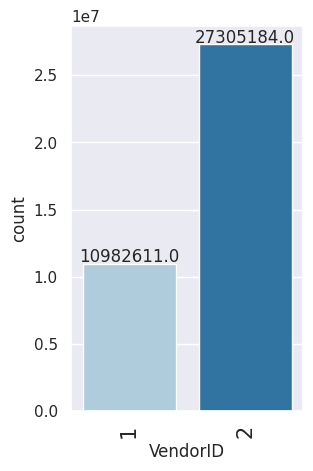

In [ ]:
barplt(df_taxi,'VendorID')

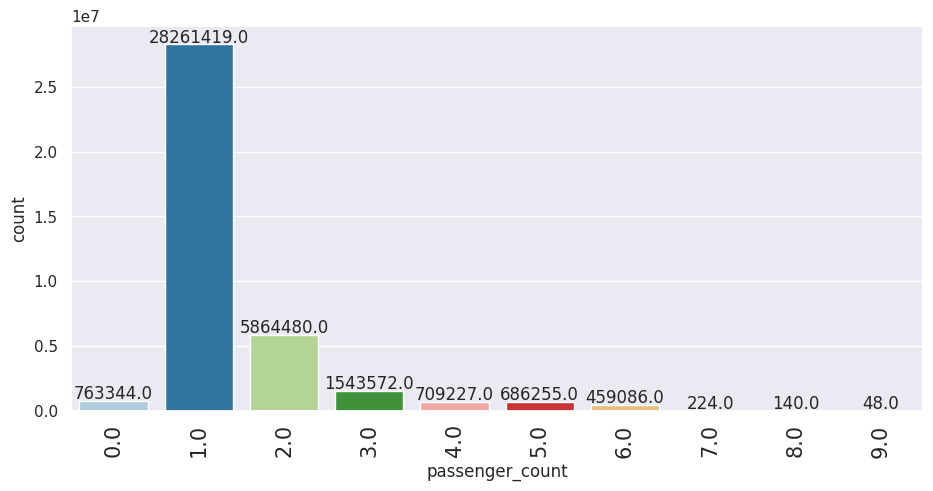

In [ ]:
barplt(df_taxi,'passenger_count') 

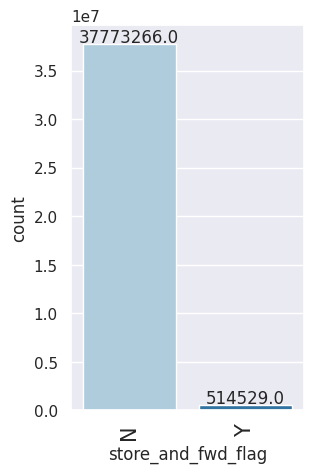

In [ ]:
barplt(df_taxi,'store_and_fwd_flag')

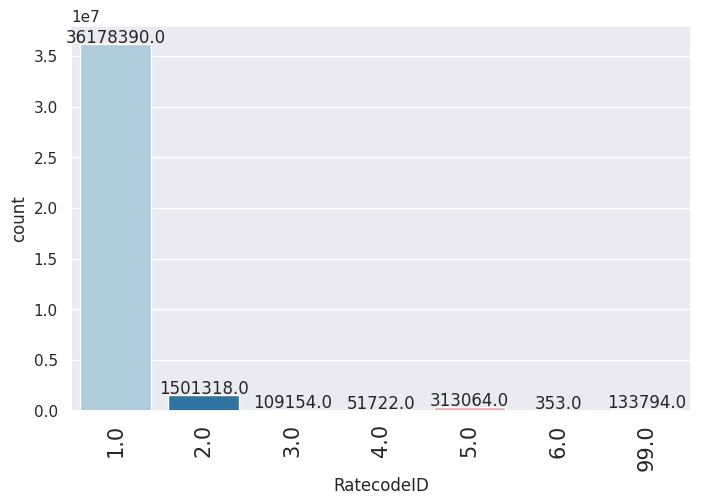

In [ ]:
barplt(df_taxi,'RatecodeID')

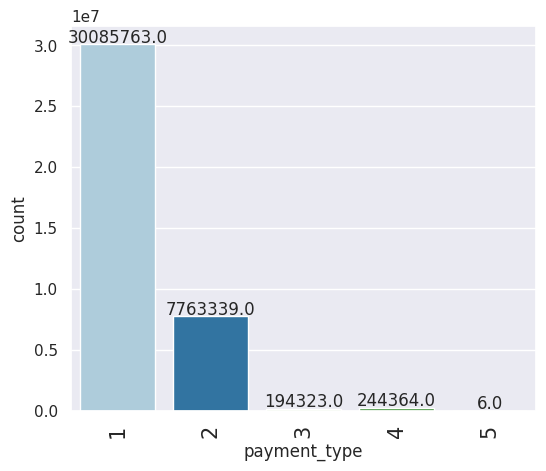

In [ ]:
barplt(df_taxi,'payment_type')

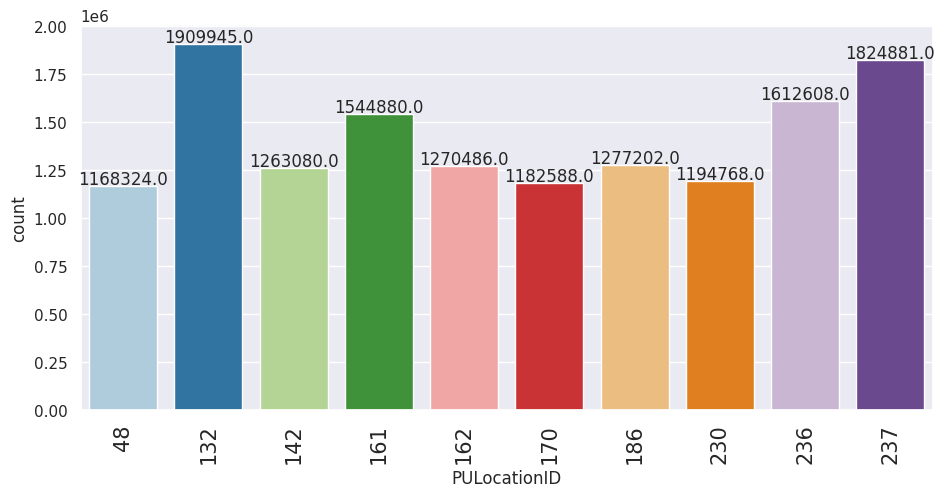

In [ ]:
barplt(df_taxi,'PULocationID',n=10)

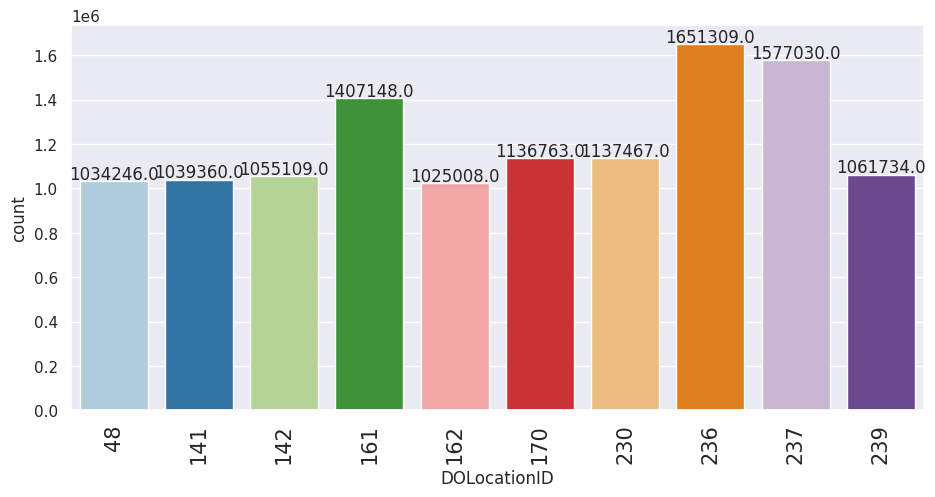

In [ ]:
barplt(df_taxi,'DOLocationID',n=10)

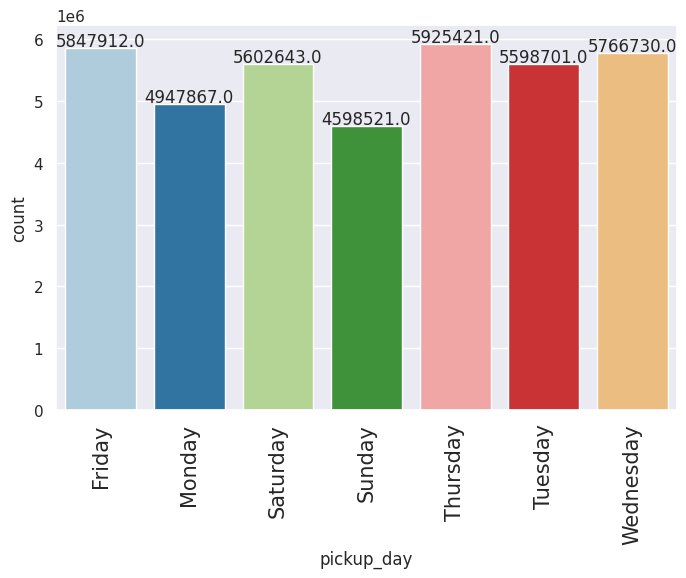

In [ ]:
barplt(df_taxi,'pickup_day')

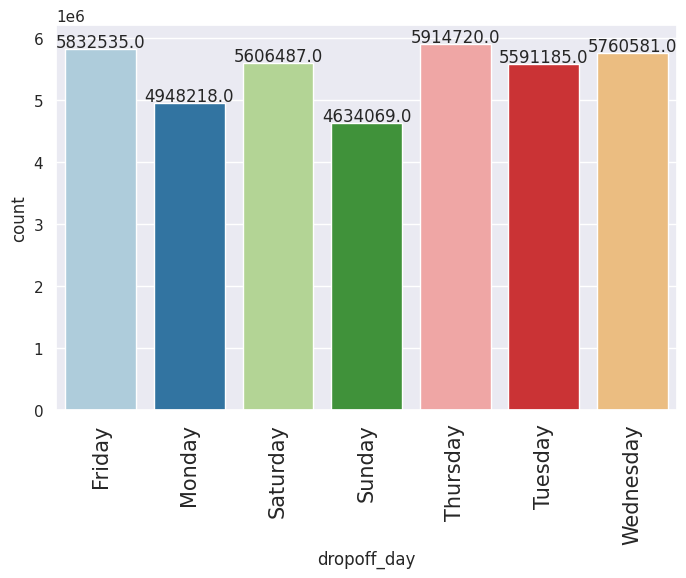

In [ ]:
barplt(df_taxi,'dropoff_day')

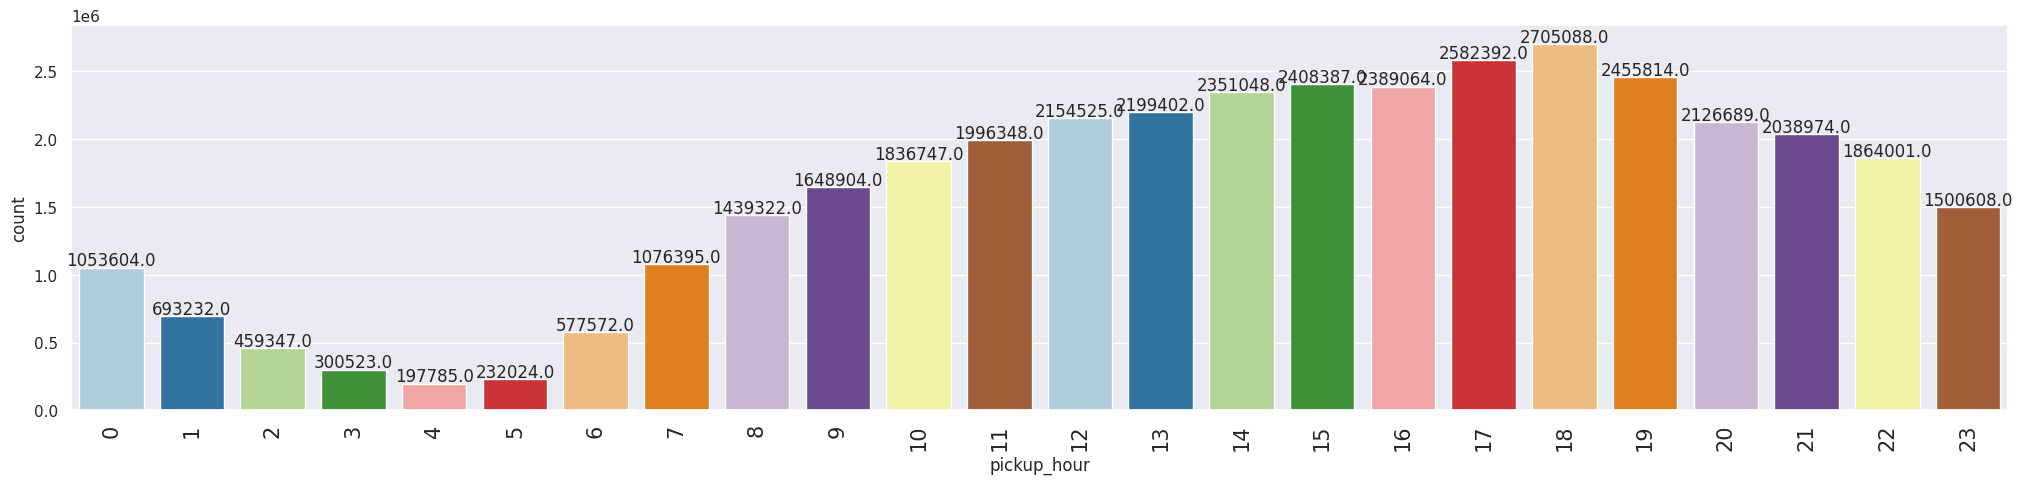

In [ ]:
barplt(df_taxi,'pickup_hour')

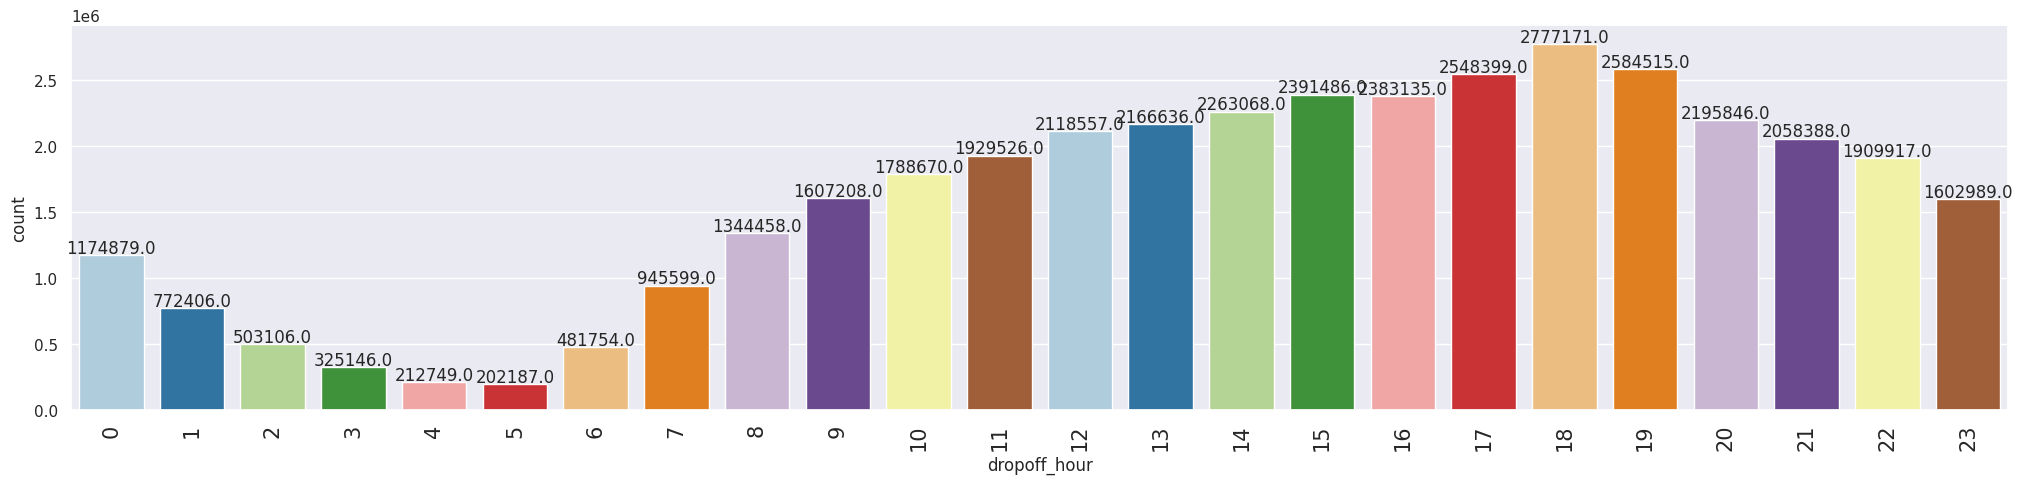

In [ ]:
barplt(df_taxi,'dropoff_hour')

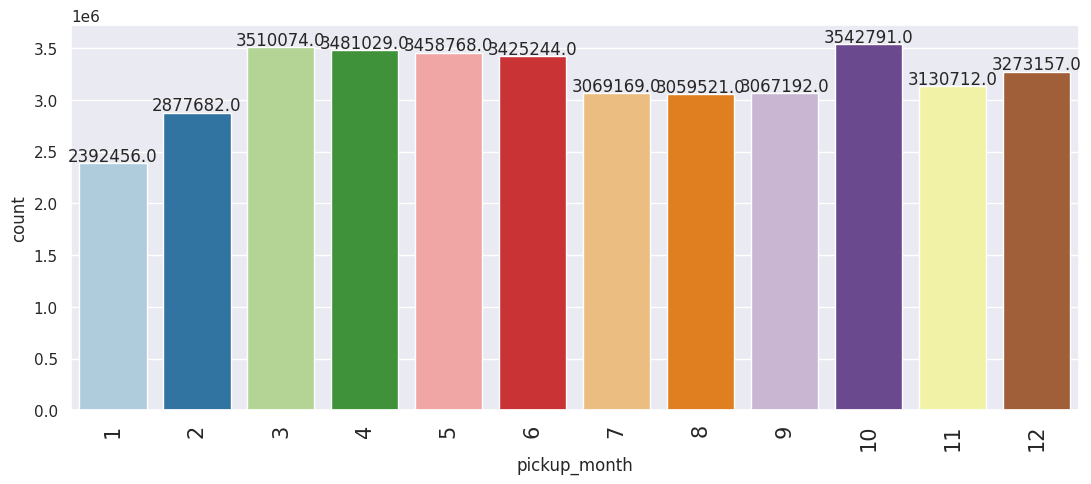

In [ ]:
barplt(df_taxi,'pickup_month')

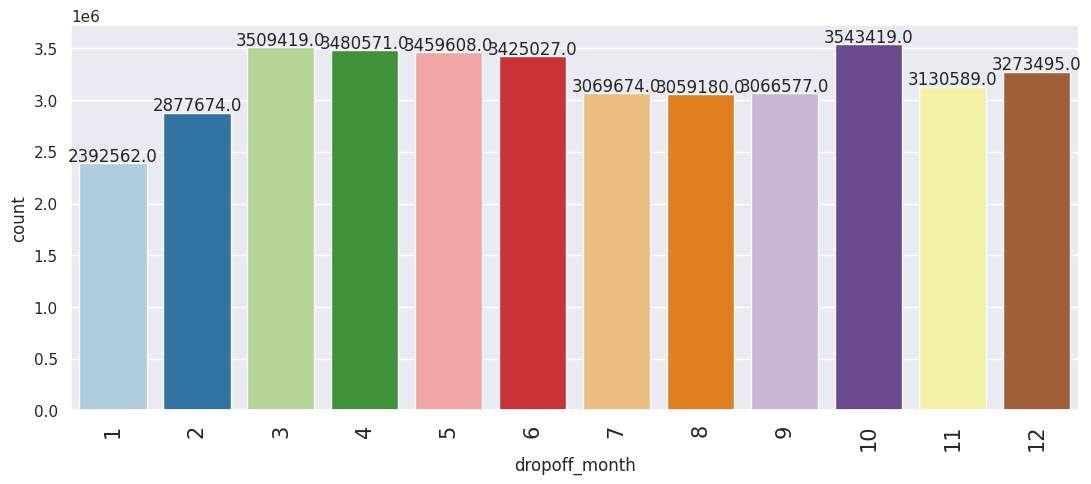

In [ ]:
barplt(df_taxi,'dropoff_month')

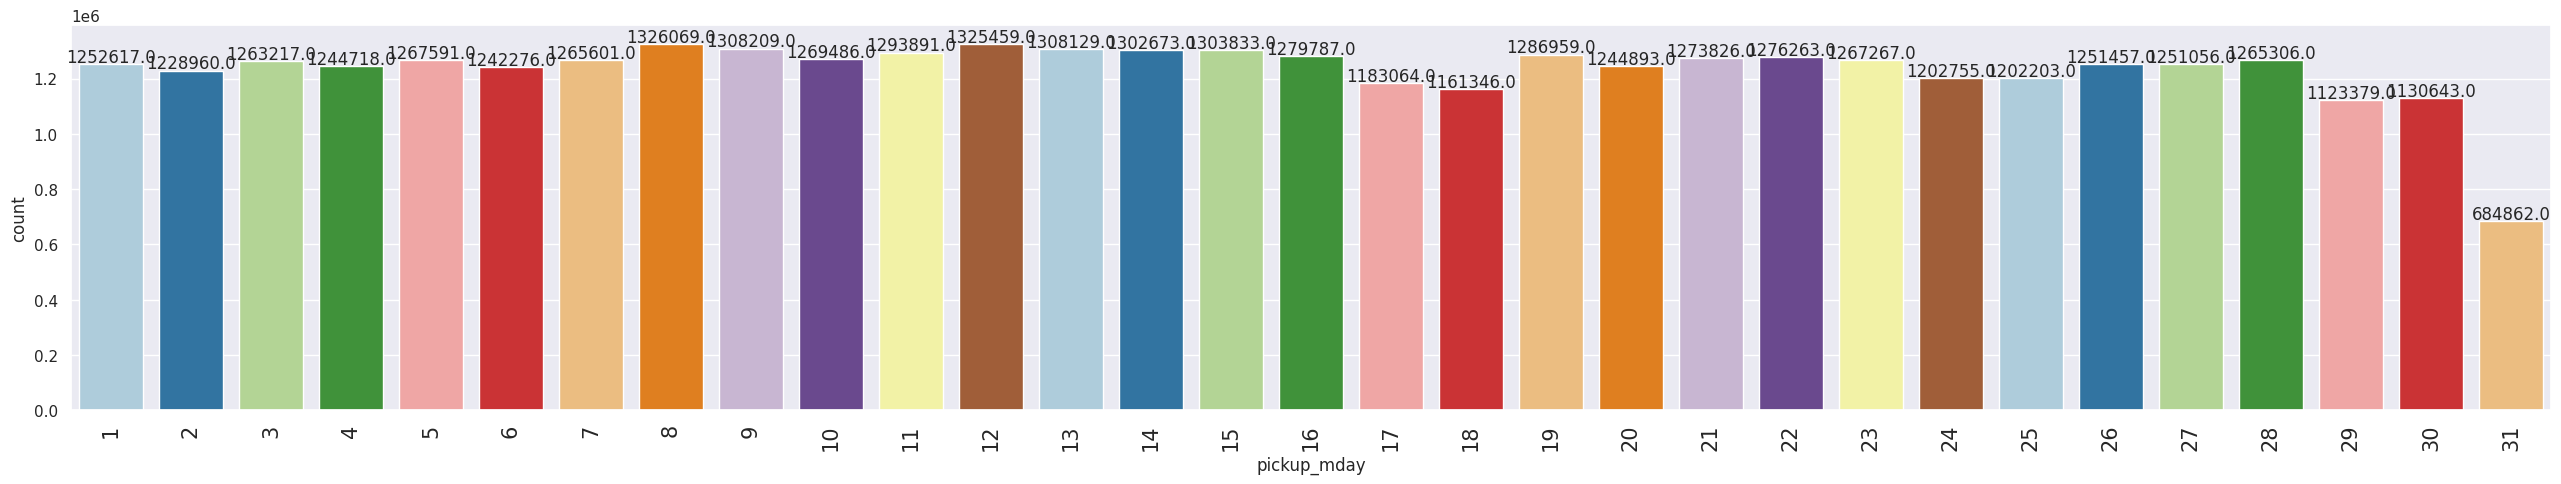

In [ ]:
barplt(df_taxi,'pickup_mday')

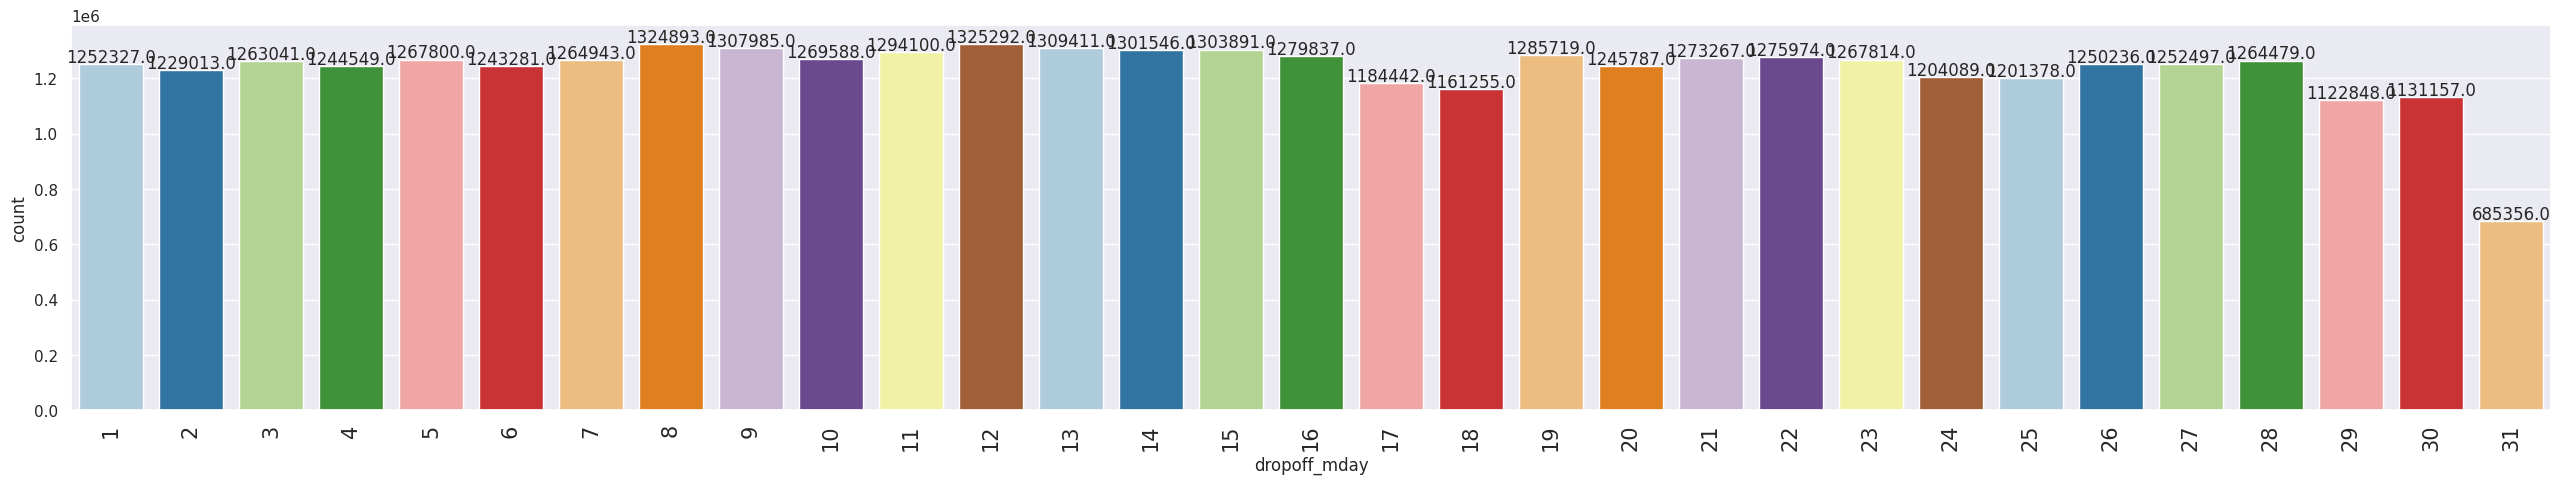

In [ ]:
barplt(df_taxi,'dropoff_mday')

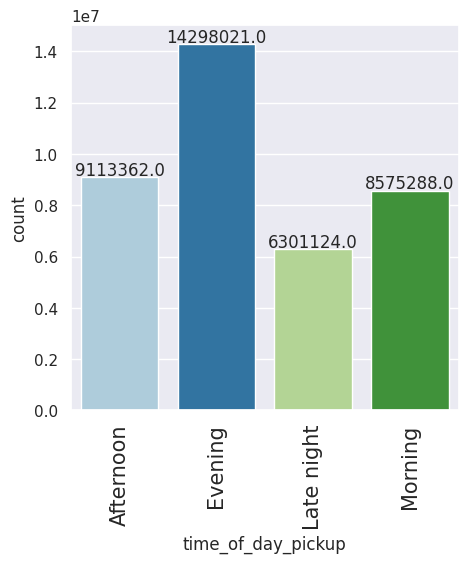

In [ ]:
barplt(df_taxi,'time_of_day_pickup')

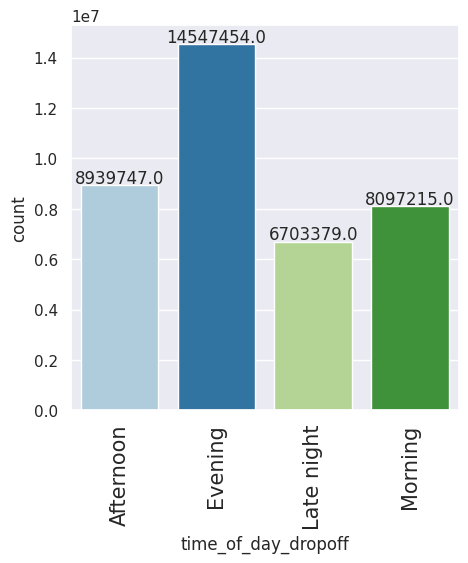

In [ ]:
barplt(df_taxi,'time_of_day_dropoff')

In [ ]:
def hiplt(data,col,kde=False):
    fig,axs=plt.subplots(nrows=2,ncols=1,sharex=True,gridspec_kw={"height_ratios": (0.25, 0.75)},figsize=(12,7))
    sns.boxplot(data=data,x=col,ax=axs[0],showmeans=True)
    sns.histplot(data=data,x=col,stat='density',kde=kde,element='step',ax=axs[1])
    #axs[1].axvline(data[col].mean(),color='green',linestyle='--')
    #axs[1].axvline(data[col].median(),color='black',linestyle='-')
    plt.show()

/usr/local/lib/python3.9/dist-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


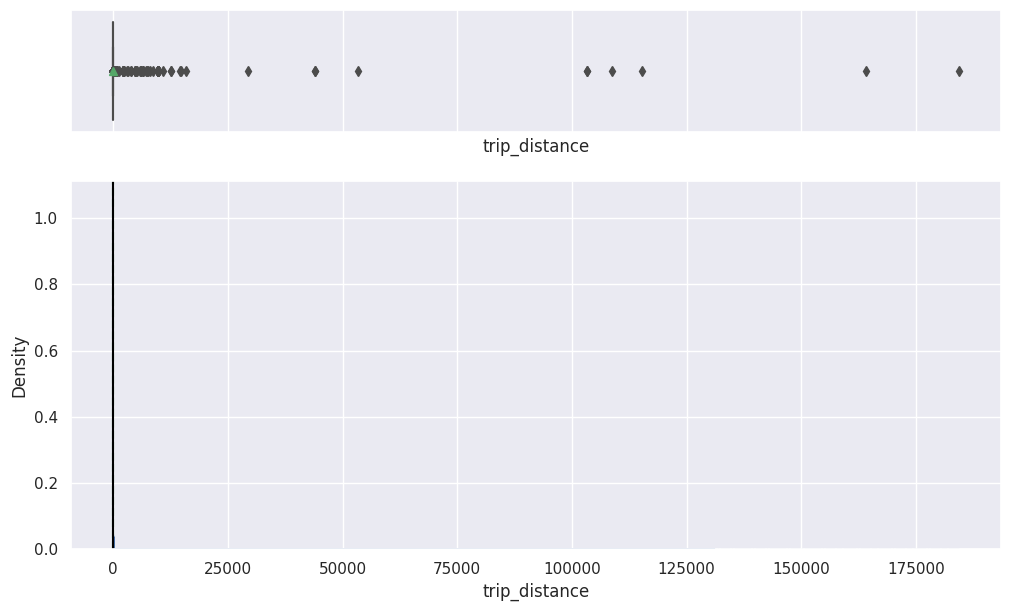

In [ ]:
hiplt(df_taxi,'trip_distance') # unusally large distance values (in miles) for a taxi ride within new york

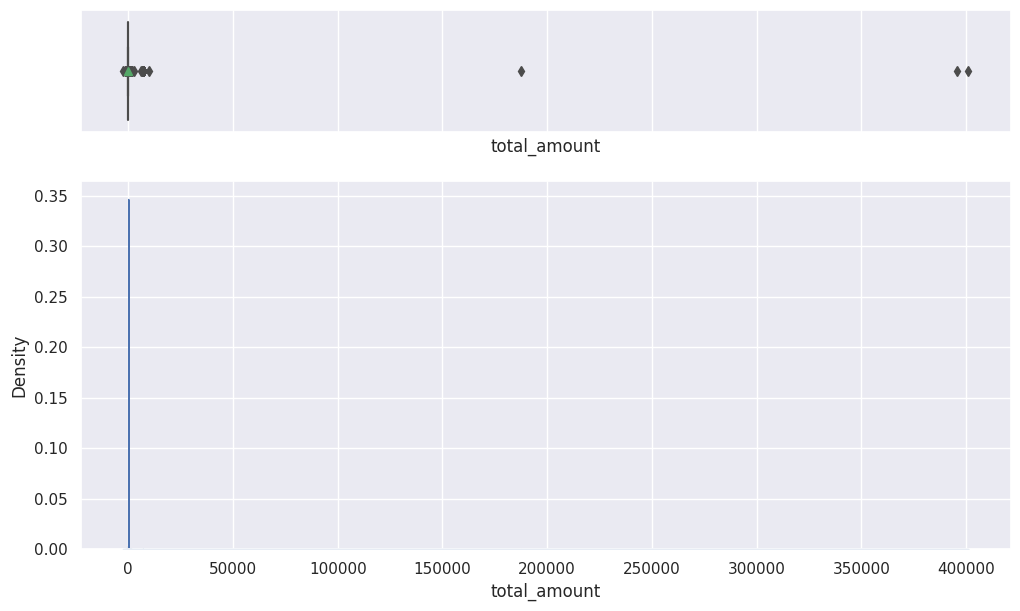

In [ ]:
hiplt(df_taxi,'total_amount') # even the total amount is unsually large for a taxi ride.

### Data Cleaning

In [ ]:
df_taxi['duration'].sort_values(ascending=False) # There are unusually large duration values and also negative duration values which is not possible.

index
17621538    619323311.0
17663101    619321572.0
17644638    619321260.0
17648670    619321252.0
17621369    619320996.0
               ...     
16339047       -40704.0
31108508       -83852.0
10246142       -84980.0
1809900       -206544.0
7360652      -4305596.0
Name: duration, Length: 38287795, dtype: float64

In [ ]:
df_taxi['trip_distance'].sort_values(ascending=False)

index
18946467    184340.796875
26162251    164072.796875
25049328    115324.117188
17780340    108786.093750
35537779    103319.460938
                ...      
25860021         0.000000
18421818         0.000000
38224124         0.000000
5554069          0.000000
36912853         0.000000
Name: trip_distance, Length: 38287795, dtype: float32

In [ ]:
df_taxi['total_amount'].sort_values(ascending=False)

index
429859      401095.625000
17467531    395848.250000
28512133    187448.265625
28752820     10003.290039
19062106      7060.850098
                ...      
35030949     -1278.000000
30526798     -1302.000000
15207948     -1315.000000
39449539     -1636.000000
11166507     -2568.000000
Name: total_amount, Length: 38287795, dtype: float32

In [ ]:
df_taxi[df_taxi['duration'] == 619323311.0] #this has the pickup year as 2002 which is unusual.

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,dropoff_day,pickup_hour,dropoff_hour,pickup_month,dropoff_month,pickup_mday,dropoff_mday,time_of_day_pickup,time_of_day_dropoff,duration
index,,,,,,,,,,,,,,,,,,,,,
17621538,2,2002-10-27 16:00:53,2022-06-12 18:16:04,2.0,22.139999,2.0,N,132,50,2,...,Sunday,16,18,10,6,27,12,Evening,Evening,619323311.0


In [ ]:
df_taxi[df_taxi['duration'] == 619321572.0]  

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,dropoff_day,pickup_hour,dropoff_hour,pickup_month,dropoff_month,pickup_mday,dropoff_mday,time_of_day_pickup,time_of_day_dropoff,duration
index,,,,,,,,,,,,,,,,,,,,,
17663101,2,2002-10-28 06:46:11,2022-06-13 08:32:23,1.0,9.26,1.0,N,264,246,2,...,Monday,6,8,10,6,28,13,Morning,Morning,619321572.0


In [ ]:
df_taxi['tpep_pickup_datetime'][17663101].year

2002

In [ ]:
# ending runtime on colab

# from google.colab import runtime
# runtime.unassign()

In [ ]:
df_taxi[df_taxi['duration'] == -4305596.0]  

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,dropoff_day,pickup_hour,dropoff_hour,pickup_month,dropoff_month,pickup_mday,dropoff_mday,time_of_day_pickup,time_of_day_dropoff,duration
index,,,,,,,,,,,,,,,,,,,,,
7360652,1,2022-03-18 07:53:14,2022-01-27 11:53:18,1.0,3.0,1.0,N,236,100,1,...,Thursday,7,11,3,1,18,27,Morning,Morning,-4305596.0


In [ ]:
df_taxi[df_taxi['duration']<0]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,dropoff_day,pickup_hour,dropoff_hour,pickup_month,dropoff_month,pickup_mday,dropoff_mday,time_of_day_pickup,time_of_day_dropoff,duration
index,,,,,,,,,,,,,,,,,,,,,
1809900,1,2022-01-24 15:23:01,2022-01-22 06:00:37,1.0,4.7,1.0,N,140,152,4,...,Saturday,15,6,1,1,24,22,Afternoon,Morning,-206544.0
6459360,1,2022-03-10 04:10:13,2022-03-10 04:10:12,1.0,0.0,99.0,N,264,265,1,...,Thursday,4,4,3,3,10,10,Late night,Late night,-1.0
6515832,1,2022-03-10 15:49:18,2022-03-10 15:49:17,1.0,0.0,99.0,N,264,132,1,...,Thursday,15,15,3,3,10,10,Afternoon,Afternoon,-1.0
7360652,1,2022-03-18 07:53:14,2022-01-27 11:53:18,1.0,3.0,1.0,N,236,100,1,...,Thursday,7,11,3,1,18,27,Morning,Morning,-4305596.0
10246142,1,2022-04-10 23:51:01,2022-04-10 00:14:41,1.0,2.6,1.0,Y,233,211,1,...,Sunday,23,0,4,4,10,10,Late night,Late night,-84980.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35275311,1,2022-11-22 09:09:00,2022-11-22 09:03:55,1.0,4.9,99.0,N,67,155,1,...,Tuesday,9,9,11,11,22,22,Morning,Morning,-305.0
35275312,1,2022-11-22 09:29:00,2022-11-22 09:03:01,1.0,0.9,99.0,N,91,155,1,...,Tuesday,9,9,11,11,22,22,Morning,Morning,-1559.0
36865273,1,2022-12-06 08:15:00,2022-12-06 08:14:34,1.0,3.0,99.0,N,56,226,1,...,Tuesday,8,8,12,12,6,6,Morning,Morning,-26.0


In [ ]:
df_taxi.drop(index=df_taxi[df_taxi['duration']<0].index,inplace=True)

In [ ]:
df_taxi.shape

(38287116, 30)

In [ ]:
df_taxi['duration'].sort_values(ascending=False)

index
17621538    619323311.0
17663101    619321572.0
17644638    619321260.0
17648670    619321252.0
17621369    619320996.0
               ...     
25897981            0.0
16370090            0.0
4031279             0.0
11511564            0.0
28951986            0.0
Name: duration, Length: 38287116, dtype: float64

In [ ]:
df_taxi[df_taxi['duration']==0]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,dropoff_day,pickup_hour,dropoff_hour,pickup_month,dropoff_month,pickup_mday,dropoff_mday,time_of_day_pickup,time_of_day_dropoff,duration
index,,,,,,,,,,,,,,,,,,,,,
1760,1,2022-01-01 00:36:35,2022-01-01 00:36:35,1.0,0.0,1.0,N,132,264,2,...,Saturday,0,0,1,1,1,1,Late night,Late night,0.0
3156,2,2022-01-01 00:04:59,2022-01-01 00:04:59,1.0,0.0,1.0,N,264,264,2,...,Saturday,0,0,1,1,1,1,Late night,Late night,0.0
4726,1,2022-01-01 01:59:36,2022-01-01 01:59:36,1.0,0.0,1.0,N,237,264,2,...,Saturday,1,1,1,1,1,1,Late night,Late night,0.0
5612,1,2022-01-01 01:38:42,2022-01-01 01:38:42,2.0,0.0,1.0,N,141,264,2,...,Saturday,1,1,1,1,1,1,Late night,Late night,0.0
5613,1,2022-01-01 01:42:30,2022-01-01 01:42:30,2.0,1.3,1.0,N,263,263,1,...,Saturday,1,1,1,1,1,1,Late night,Late night,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39520594,1,2022-12-31 21:10:06,2022-12-31 21:10:06,1.0,0.0,5.0,Y,138,264,2,...,Saturday,21,21,12,12,31,31,Evening,Evening,0.0
39524388,1,2022-12-31 22:02:41,2022-12-31 22:02:41,1.0,0.0,1.0,N,189,264,2,...,Saturday,22,22,12,12,31,31,Late night,Late night,0.0
39524598,1,2022-12-31 22:30:57,2022-12-31 22:30:57,1.0,0.0,1.0,N,238,264,2,...,Saturday,22,22,12,12,31,31,Late night,Late night,0.0


In [ ]:
df_taxi[df_taxi['duration']==0]['trip_distance'].value_counts() # Since most of the trip distances are 0 they may be voided trips and for the trip_distance > 1 mile there might be some error in the transfer of the data from taxi to server.

0.00     16058
0.01        98
0.02        49
1.40        37
1.10        36
         ...  
15.38        1
2.71         1
18.16        1
11.90        1
0.19         1
Name: trip_distance, Length: 296, dtype: int64

In [ ]:
df_taxi[df_taxi['duration']==0]['total_amount'].value_counts() # Even though there is fare charged since the trip duration is 0, so they might bring inaccuracies in the data prediction. So it is better to drop these rows.

5.800781      1298
0.000000       931
6.300781       836
6.800781       700
5.800000       400
              ... 
79.580002        1
56.150002        1
70.800003        1
106.800003       1
10.398438        1
Name: total_amount, Length: 1691, dtype: int64

In [ ]:
df_taxi.drop(index=df_taxi[df_taxi['duration']==0].index,inplace=True)

In [ ]:
df_taxi[df_taxi['tpep_pickup_datetime'].dt.year != 2022]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,dropoff_day,pickup_hour,dropoff_hour,pickup_month,dropoff_month,pickup_mday,dropoff_mday,time_of_day_pickup,time_of_day_dropoff,duration
index,,,,,,,,,,,,,,,,,,,,,
940,2,2021-12-31 23:52:28,2021-12-31 23:59:42,1.0,1.45,1.0,N,238,263,1,...,Friday,23,23,12,12,31,31,Late night,Late night,434.0
1028,2,2021-12-31 23:59:23,2022-01-01 00:02:27,2.0,1.06,1.0,N,79,137,1,...,Saturday,23,0,12,1,31,1,Late night,Late night,184.0
1049,2,2021-12-31 23:57:54,2022-01-01 00:03:07,1.0,1.13,1.0,N,148,107,1,...,Saturday,23,0,12,1,31,1,Late night,Late night,313.0
1290,2,2021-12-31 23:57:35,2022-01-01 00:12:11,2.0,4.10,1.0,N,249,140,1,...,Saturday,23,0,12,1,31,1,Late night,Late night,876.0
1442,2,2021-12-31 23:58:55,2022-01-01 00:26:45,1.0,9.43,1.0,N,137,188,2,...,Saturday,23,0,12,1,31,1,Late night,Late night,1670.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39526788,2,2023-01-01 00:31:23,2023-01-01 00:43:25,1.0,3.06,1.0,N,239,41,1,...,Sunday,0,0,1,1,1,1,Late night,Late night,722.0
39527762,2,2023-01-01 00:01:43,2023-01-01 00:01:46,1.0,0.16,5.0,N,169,169,1,...,Sunday,0,0,1,1,1,1,Late night,Late night,3.0
39527849,2,2023-01-01 00:03:33,2023-01-01 00:12:57,6.0,1.19,1.0,N,68,158,1,...,Sunday,0,0,1,1,1,1,Late night,Late night,564.0


In [ ]:
df_taxi.drop(index=df_taxi[df_taxi['tpep_pickup_datetime'].dt.year != 2022].index,inplace=True) # dropping rows that do not belong to year 2022

In [ ]:
df_taxi.drop(index=df_taxi[df_taxi['tpep_dropoff_datetime'].dt.year != 2022].index,inplace=True) # dropping rows that do not belong to year 2022

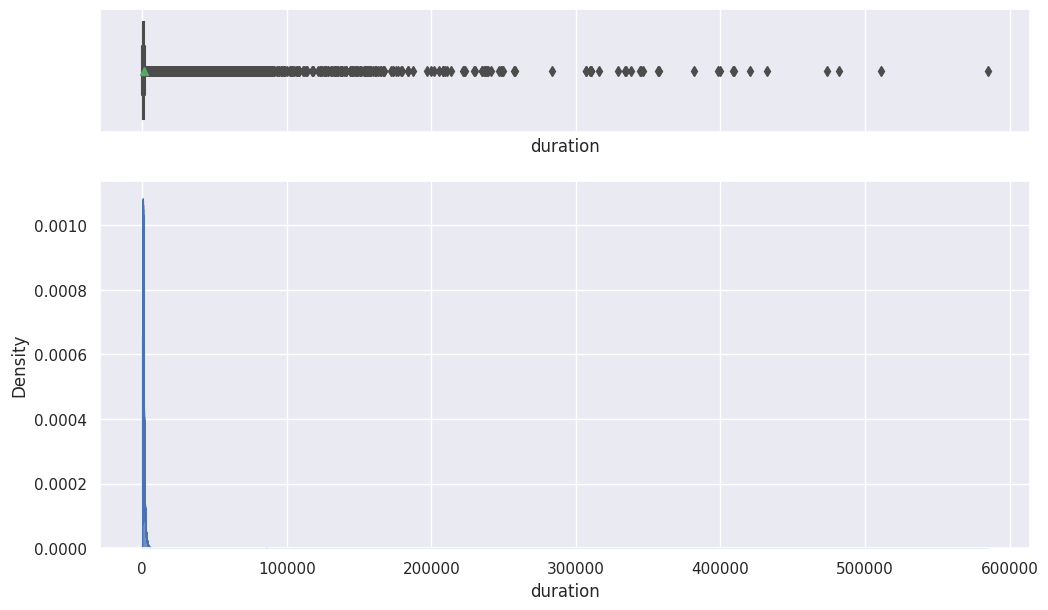

In [ ]:
hiplt(df_taxi,'duration')

In [ ]:
np.percentile(df_taxi['duration'],99.88)

26639.945599995553

In [ ]:
np.percentile(df_taxi['duration'],99.886)

43485.37647999823

In [ ]:
df_taxi[(df_taxi['duration']>= np.percentile(df_taxi['duration'],99.88)) & (df_taxi['duration']<= np.percentile(df_taxi['duration'],99.886))]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,dropoff_day,pickup_hour,dropoff_hour,pickup_month,dropoff_month,pickup_mday,dropoff_mday,time_of_day_pickup,time_of_day_dropoff,duration
index,,,,,,,,,,,,,,,,,,,,,
28943,2,2022-01-01 13:32:42,2022-01-02,2.0,3.530000,1.0,N,237,114,1,...,Sunday,13,0,1,1,1,2,Afternoon,Late night,37638.0
29240,2,2022-01-01 13:36:31,2022-01-02,1.0,7.230000,1.0,N,263,87,2,...,Sunday,13,0,1,1,1,2,Afternoon,Late night,37409.0
31048,2,2022-01-01 14:52:20,2022-01-02,1.0,17.860001,2.0,N,132,68,1,...,Sunday,14,0,1,1,1,2,Afternoon,Late night,32860.0
35458,2,2022-01-01 15:43:59,2022-01-02,1.0,1.710000,1.0,N,229,262,1,...,Sunday,15,0,1,1,1,2,Afternoon,Late night,29761.0
37183,2,2022-01-01 15:15:59,2022-01-02,1.0,5.650000,1.0,N,75,114,1,...,Sunday,15,0,1,1,1,2,Afternoon,Late night,31441.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39482893,2,2022-12-31 14:40:55,2023-01-01,2.0,0.410000,1.0,N,142,43,1,...,Sunday,14,0,12,1,31,1,Afternoon,Late night,33545.0
39483238,2,2022-12-31 14:37:48,2023-01-01,1.0,17.770000,2.0,N,132,161,1,...,Sunday,14,0,12,1,31,1,Afternoon,Late night,33732.0
39485522,2,2022-12-31 14:12:18,2023-01-01,4.0,17.610001,2.0,N,262,132,1,...,Sunday,14,0,12,1,31,1,Afternoon,Late night,35262.0


In [ ]:
df_taxi.drop(index=df_taxi[df_taxi['duration']>= np.percentile(df_taxi['duration'],99.886)].index,inplace=True)

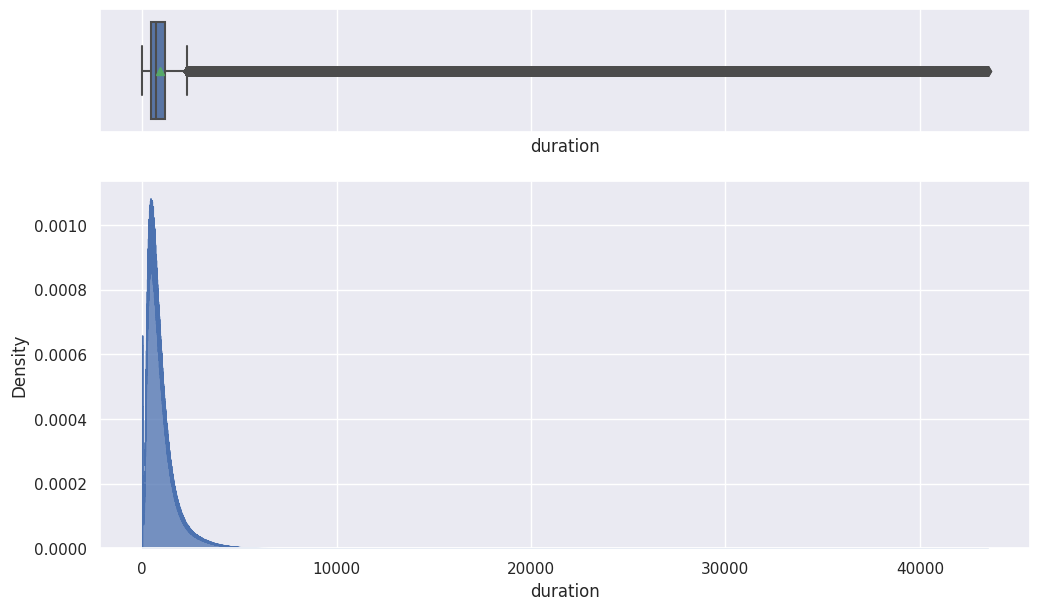

In [ ]:
hiplt(df_taxi,'duration')

In [ ]:
np.percentile(df_taxi['trip_distance'],99.9)

29.209999084472656

In [ ]:
df_taxi[(df_taxi['trip_distance']>= np.percentile(df_taxi['duration'],99.8))]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,dropoff_day,pickup_hour,dropoff_hour,pickup_month,dropoff_month,pickup_mday,dropoff_mday,time_of_day_pickup,time_of_day_dropoff,duration
index,,,,,,,,,,,,,,,,,,,,,
8054108,2,2022-03-24 13:56:56,2022-03-24 13:58:14,1.0,53440.550781,5.0,N,193,193,1,...,Thursday,13,13,3,3,24,24,Afternoon,Afternoon,78.0
8077904,2,2022-03-24 16:59:11,2022-03-24 17:51:21,1.0,7170.549805,2.0,N,132,48,1,...,Thursday,16,17,3,3,24,24,Evening,Evening,3130.0
13101200,2,2022-05-05 06:03:36,2022-05-05 06:14:37,1.0,29445.650391,5.0,N,263,107,1,...,Thursday,6,6,5,5,5,5,Morning,Morning,661.0
14327429,2,2022-05-15 15:28:26,2022-05-15 15:33:03,1.0,6474.930176,1.0,N,263,262,2,...,Sunday,15,15,5,5,15,15,Afternoon,Afternoon,277.0
14327430,2,2022-05-15 15:28:26,2022-05-15 15:33:03,1.0,6474.930176,1.0,N,263,262,2,...,Sunday,15,15,5,5,15,15,Afternoon,Afternoon,277.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39136259,2,2022-12-27 15:41:34,2022-12-27 16:05:14,1.0,9674.509766,1.0,N,264,264,2,...,Tuesday,15,16,12,12,27,27,Afternoon,Evening,1420.0
39158160,2,2022-12-27 19:50:47,2022-12-27 20:01:00,1.0,9674.820312,1.0,N,264,236,1,...,Tuesday,19,20,12,12,27,27,Evening,Evening,613.0
39221346,2,2022-12-28 15:49:39,2022-12-28 16:00:50,2.0,9673.929688,1.0,N,264,237,1,...,Wednesday,15,16,12,12,28,28,Afternoon,Evening,671.0


In [ ]:
df_taxi[(df_taxi['trip_distance'] >= 100) & (df_taxi['duration']<10800)]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,dropoff_day,pickup_hour,dropoff_hour,pickup_month,dropoff_month,pickup_mday,dropoff_mday,time_of_day_pickup,time_of_day_dropoff,duration
index,,,,,,,,,,,,,,,,,,,,,
23729,1,2022-01-01 11:42:44,2022-01-01 12:00:40,3.0,179.600006,1.0,N,263,144,1,...,Saturday,11,12,1,1,1,1,Morning,Afternoon,1076.0
29219,1,2022-01-01 13:30:05,2022-01-01 13:53:48,2.0,214.100006,1.0,N,144,7,1,...,Saturday,13,13,1,1,1,1,Afternoon,Afternoon,1423.0
71368,1,2022-01-02 10:59:53,2022-01-02 11:19:12,1.0,172.800003,1.0,N,238,137,1,...,Sunday,10,11,1,1,2,2,Morning,Morning,1159.0
85751,1,2022-01-02 14:35:42,2022-01-02 14:52:48,1.0,120.199997,1.0,N,230,24,1,...,Sunday,14,14,1,1,2,2,Afternoon,Afternoon,1026.0
99158,1,2022-01-02 17:19:52,2022-01-02 17:40:12,2.0,121.099998,1.0,N,162,45,1,...,Sunday,17,17,1,1,2,2,Evening,Evening,1220.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39221346,2,2022-12-28 15:49:39,2022-12-28 16:00:50,2.0,9673.929688,1.0,N,264,237,1,...,Wednesday,15,16,12,12,28,28,Afternoon,Evening,671.0
39222780,2,2022-12-28 15:43:22,2022-12-28 16:00:05,1.0,9674.599609,1.0,N,264,239,2,...,Wednesday,15,16,12,12,28,28,Afternoon,Evening,1003.0
39230723,2,2022-12-28 16:11:37,2022-12-28 16:34:53,1.0,2287.800049,1.0,N,264,264,1,...,Wednesday,16,16,12,12,28,28,Evening,Evening,1396.0


In [ ]:
# Would like to add the speed column to the dataframe as there are several unusual data points where the distance is very high and the duraation of the trip is low.

df_taxi['speed'] = (df_taxi['trip_distance']/df_taxi['duration'])*3600

In [ ]:
df_taxi.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,pickup_hour,dropoff_hour,pickup_month,dropoff_month,pickup_mday,dropoff_mday,time_of_day_pickup,time_of_day_dropoff,duration,speed
index,,,,,,,,,,,,,,,,,,,,,
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.80,1.0,N,142,236,1,...,0,0,1,1,1,1,Late night,Late night,1069.0,12.797006
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.10,1.0,N,236,42,1,...,0,0,1,1,1,1,Late night,Late night,504.0,14.999999
2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,0.97,1.0,N,166,166,1,...,0,1,1,1,1,1,Late night,Late night,538.0,6.490707
3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.0,1.09,1.0,N,114,68,2,...,0,0,1,1,1,1,Late night,Late night,602.0,6.518273
4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.0,4.30,1.0,N,68,163,1,...,0,1,1,1,1,1,Late night,Late night,2252.0,6.873890


<Axes: >

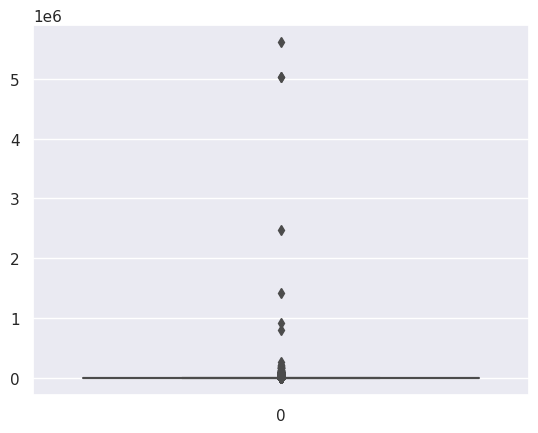

In [ ]:
sns.boxplot(df_taxi['speed'])

In [ ]:
np.percentile(df_taxi['speed'],99)

36.8706210692571

In [ ]:
df_taxi[df_taxi['speed']>65][['trip_distance','duration','speed','total_amount']]

,trip_distance,duration,speed,total_amount
index,,,,
393,0.800000,22.0,130.909093,62.299999
1312,2.310000,21.0,395.999990,15.800000
2593,5.400000,11.0,1767.272758,6.950000
3179,8.760000,3.0,10512.000275,39.849998
3685,5.800000,57.0,366.315802,4.300000
...,...,...,...,...
39522562,0.790000,16.0,177.750005,10.500000
39524599,2.000000,3.0,2400.000000,19.656250
39526278,21.299999,136.0,563.823509,18.796875


In [ ]:
# Since the speed of the car cannot be greater than 65mph according to NY traffic rules all the rows which have speed above 65mph will be dropped

df_taxi.drop(index=df_taxi[df_taxi['speed']>65].index,inplace=True)

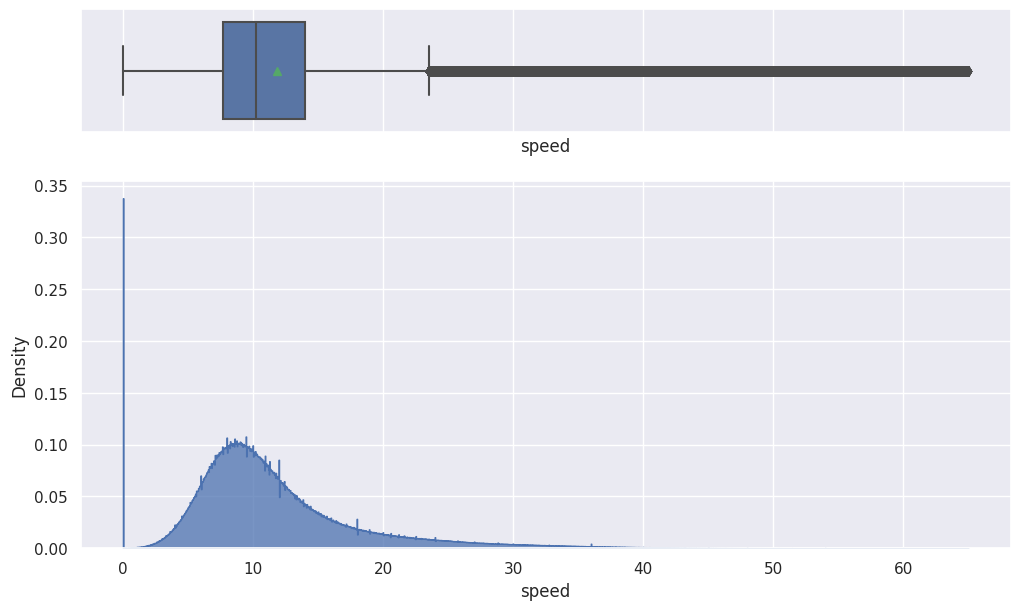

In [ ]:
hiplt(df_taxi,'speed')

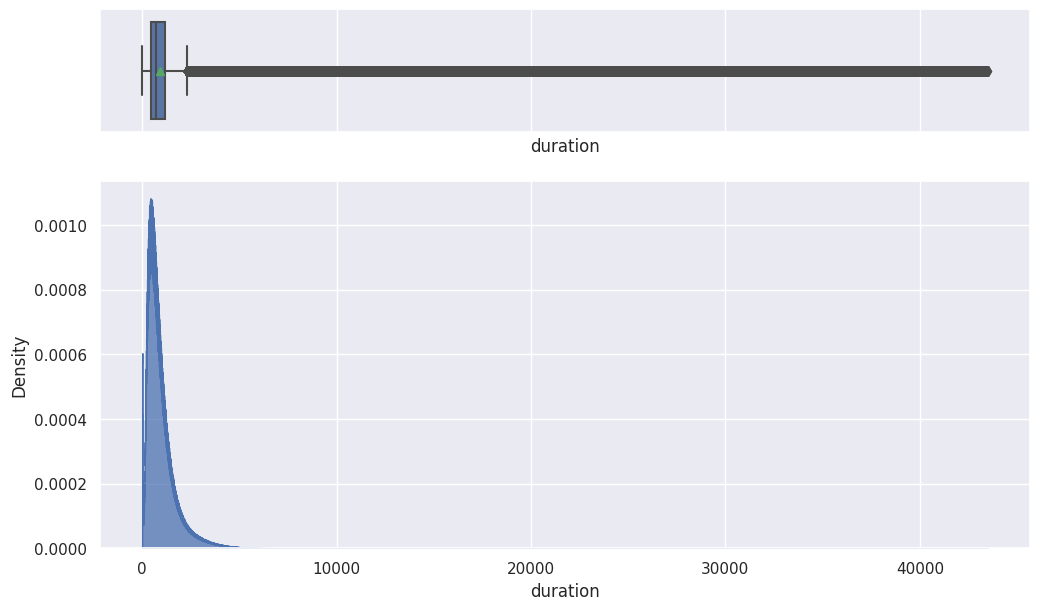

In [ ]:
hiplt(df_taxi,'duration')

In [ ]:
df_taxi[df_taxi['trip_distance']==0]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,pickup_hour,dropoff_hour,pickup_month,dropoff_month,pickup_mday,dropoff_mday,time_of_day_pickup,time_of_day_dropoff,duration,speed
index,,,,,,,,,,,,,,,,,,,,,
21,1,2022-01-01 00:06:10,2022-01-01 00:08:58,1.0,0.0,1.0,N,161,161,4,...,0,0,1,1,1,1,Late night,Late night,168.0,0.0
141,1,2022-01-01 00:41:54,2022-01-01 00:42:17,1.0,0.0,1.0,N,249,249,2,...,0,0,1,1,1,1,Late night,Late night,23.0,0.0
144,1,2022-01-01 00:23:57,2022-01-01 00:24:49,0.0,0.0,1.0,N,263,263,2,...,0,0,1,1,1,1,Late night,Late night,52.0,0.0
245,2,2022-01-01 00:49:57,2022-01-01 00:50:17,1.0,0.0,1.0,N,79,79,2,...,0,0,1,1,1,1,Late night,Late night,20.0,0.0
362,2,2022-01-01 00:39:28,2022-01-01 00:39:47,1.0,0.0,5.0,N,141,140,1,...,0,0,1,1,1,1,Late night,Late night,19.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39529274,1,2022-12-31 23:06:21,2022-12-31 23:07:54,1.0,0.0,1.0,N,236,236,2,...,23,23,12,12,31,31,Late night,Late night,93.0,0.0
39529313,2,2022-12-31 23:01:08,2022-12-31 23:01:12,2.0,0.0,5.0,N,186,186,1,...,23,23,12,12,31,31,Late night,Late night,4.0,0.0
39529601,2,2022-12-31 23:10:10,2022-12-31 23:27:30,1.0,0.0,1.0,N,68,48,2,...,23,23,12,12,31,31,Late night,Late night,1040.0,0.0


In [ ]:
# There is data which has trip_distance=0 and duration > 0. Since this induces outliers for model all these rows are dropped. This 0 distance may have been occured due to unidetified drop location or some error during data transfer.

df_taxi.drop(index=df_taxi[df_taxi['trip_distance']==0].index,inplace=True)

In [ ]:
df_taxi[df_taxi['duration']<120]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,pickup_hour,dropoff_hour,pickup_month,dropoff_month,pickup_mday,dropoff_mday,time_of_day_pickup,time_of_day_dropoff,duration,speed
index,,,,,,,,,,,,,,,,,,,,,
102,1,2022-01-01 00:54:05,2022-01-01 00:54:44,1.0,0.10,1.0,N,265,265,2,...,0,0,1,1,1,1,Late night,Late night,39.0,9.230769
108,2,2022-01-01 00:43:30,2022-01-01 00:45:09,3.0,0.50,1.0,N,236,236,1,...,0,0,1,1,1,1,Late night,Late night,99.0,18.181818
139,2,2022-01-01 00:27:27,2022-01-01 00:29:17,1.0,0.30,1.0,N,74,74,2,...,0,0,1,1,1,1,Late night,Late night,110.0,9.818182
199,1,2022-01-01 00:55:04,2022-01-01 00:56:57,0.0,0.60,1.0,N,239,239,1,...,0,0,1,1,1,1,Late night,Late night,113.0,19.115045
384,1,2022-01-01 00:54:42,2022-01-01 00:56:12,0.0,0.30,1.0,N,68,68,1,...,0,0,1,1,1,1,Late night,Late night,90.0,12.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39529281,2,2022-12-31 23:02:58,2022-12-31 23:03:04,4.0,0.01,3.0,N,132,132,3,...,23,23,12,12,31,31,Late night,Late night,6.0,6.000000
39529287,2,2022-12-31 23:53:34,2022-12-31 23:55:30,2.0,0.55,1.0,N,116,116,2,...,23,23,12,12,31,31,Late night,Late night,116.0,17.068966
39529372,1,2022-12-31 23:08:14,2022-12-31 23:09:09,1.0,0.20,1.0,N,75,75,2,...,23,23,12,12,31,31,Late night,Late night,55.0,13.090909


In [ ]:
df_taxi.drop(index=df_taxi[df_taxi['trip_distance']<0.1].index,inplace=True)

In [ ]:
df_taxi.drop(index=df_taxi[df_taxi['duration']<60].index,inplace=True)

In [ ]:
df_taxi[df_taxi['total_amount']<=0]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,pickup_hour,dropoff_hour,pickup_month,dropoff_month,pickup_mday,dropoff_mday,time_of_day_pickup,time_of_day_dropoff,duration,speed
index,,,,,,,,,,,,,,,,,,,,,
154,2,2022-01-01 00:26:37,2022-01-01 00:39:35,1.0,7.38,1.0,N,132,265,4,...,0,0,1,1,1,1,Late night,Late night,778.0,34.149101
521,2,2022-01-01 00:27:18,2022-01-01 00:40:50,1.0,5.14,1.0,N,152,48,4,...,0,0,1,1,1,1,Late night,Late night,812.0,22.788177
523,2,2022-01-01 00:59:33,2022-01-01 01:14:09,4.0,5.37,5.0,N,50,265,2,...,0,1,1,1,1,1,Late night,Late night,876.0,22.068493
580,2,2022-01-01 00:16:58,2022-01-01 00:19:41,1.0,0.46,1.0,N,90,234,2,...,0,0,1,1,1,1,Late night,Late night,163.0,10.159509
714,2,2022-01-01 00:29:12,2022-01-01 00:40:29,1.0,3.13,1.0,N,13,246,4,...,0,0,1,1,1,1,Late night,Late night,677.0,16.644018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39529309,2,2022-12-31 23:03:45,2022-12-31 23:21:54,4.0,4.01,1.0,N,148,17,4,...,23,23,12,12,31,31,Late night,Late night,1089.0,13.256199
39529352,2,2022-12-31 23:04:30,2022-12-31 23:17:14,1.0,2.27,1.0,N,107,237,2,...,23,23,12,12,31,31,Late night,Late night,764.0,10.696335
39529511,2,2022-12-31 23:03:19,2022-12-31 23:07:44,1.0,0.53,1.0,N,243,243,3,...,23,23,12,12,31,31,Late night,Late night,265.0,7.200000


In [ ]:
# The negative total_amount might represent the voided trip after the start. Further, a trip with total_amount as 0 means the trip did not happen or some error in data. So we remove these records.

df_taxi.drop(index=df_taxi[df_taxi['total_amount']<=0].index,inplace=True)

In [ ]:
df_taxi[df_taxi['passenger_count'] == 0]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,pickup_hour,dropoff_hour,pickup_month,dropoff_month,pickup_mday,dropoff_mday,time_of_day_pickup,time_of_day_dropoff,duration,speed
index,,,,,,,,,,,,,,,,,,,,,
143,1,2022-01-01 00:17:34,2022-01-01 00:20:25,0.0,0.9,1.0,N,236,262,2,...,0,0,1,1,1,1,Late night,Late night,171.0,18.947368
145,1,2022-01-01 00:31:53,2022-01-01 00:36:31,0.0,1.3,1.0,N,140,229,1,...,0,0,1,1,1,1,Late night,Late night,278.0,16.834532
146,1,2022-01-01 00:41:40,2022-01-01 00:46:11,0.0,1.3,1.0,N,163,236,1,...,0,0,1,1,1,1,Late night,Late night,271.0,17.269372
157,1,2022-01-01 00:55:36,2022-01-01 01:03:26,0.0,0.5,1.0,N,162,161,1,...,0,1,1,1,1,1,Late night,Late night,470.0,3.829787
199,1,2022-01-01 00:55:04,2022-01-01 00:56:57,0.0,0.6,1.0,N,239,239,1,...,0,0,1,1,1,1,Late night,Late night,113.0,19.115045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39529354,1,2022-12-31 23:44:16,2022-12-31 23:52:59,0.0,0.7,5.0,N,265,265,2,...,23,23,12,12,31,31,Late night,Late night,523.0,4.818356
39529441,1,2022-12-31 23:04:01,2022-12-31 23:24:34,0.0,7.0,1.0,N,79,260,1,...,23,23,12,12,31,31,Late night,Late night,1233.0,20.437956
39529481,1,2022-12-31 23:12:40,2022-12-31 23:31:03,0.0,2.5,1.0,N,161,107,1,...,23,23,12,12,31,31,Late night,Late night,1103.0,8.159565


In [ ]:
# Dropping all the rows where passenger count is 0, since these cannot be counted as a trip.

df_taxi.drop(index=df_taxi[(df_taxi['passenger_count']==0) | (df_taxi['passenger_count']>6)].index,inplace=True)

In [ ]:
df_taxi[df_taxi['RatecodeID']==99.0]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,pickup_hour,dropoff_hour,pickup_month,dropoff_month,pickup_mday,dropoff_mday,time_of_day_pickup,time_of_day_dropoff,duration,speed
index,,,,,,,,,,,,,,,,,,,,,
8172,1,2022-01-01 01:11:42,2022-01-01 01:34:48,1.0,4.2,99.0,N,254,69,1,...,1,1,1,1,1,1,Late night,Late night,1386.0,10.909090
8173,1,2022-01-01 01:49:58,2022-01-01 02:12:27,1.0,5.1,99.0,N,213,41,1,...,1,2,1,1,1,1,Late night,Late night,1349.0,13.610081
8524,1,2022-01-01 01:53:03,2022-01-01 02:06:10,1.0,1.6,99.0,N,74,238,1,...,1,2,1,1,1,1,Late night,Late night,787.0,7.318933
12126,1,2022-01-01 02:23:22,2022-01-01 02:27:07,1.0,0.3,99.0,N,117,117,1,...,2,2,1,1,1,1,Late night,Late night,225.0,4.800000
18378,1,2022-01-01 07:55:33,2022-01-01 08:35:11,1.0,0.8,99.0,N,74,35,1,...,7,8,1,1,1,1,Morning,Morning,2378.0,1.211102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39516682,1,2022-12-31 20:57:21,2022-12-31 21:26:46,1.0,12.6,99.0,N,108,216,1,...,20,21,12,12,31,31,Evening,Evening,1765.0,25.699717
39519809,1,2022-12-31 21:53:48,2022-12-31 22:13:48,1.0,7.0,99.0,N,241,152,1,...,21,22,12,12,31,31,Evening,Late night,1200.0,21.000000
39520528,1,2022-12-31 21:07:28,2022-12-31 21:49:53,1.0,12.1,99.0,N,177,55,1,...,21,21,12,12,31,31,Evening,Evening,2545.0,17.115914


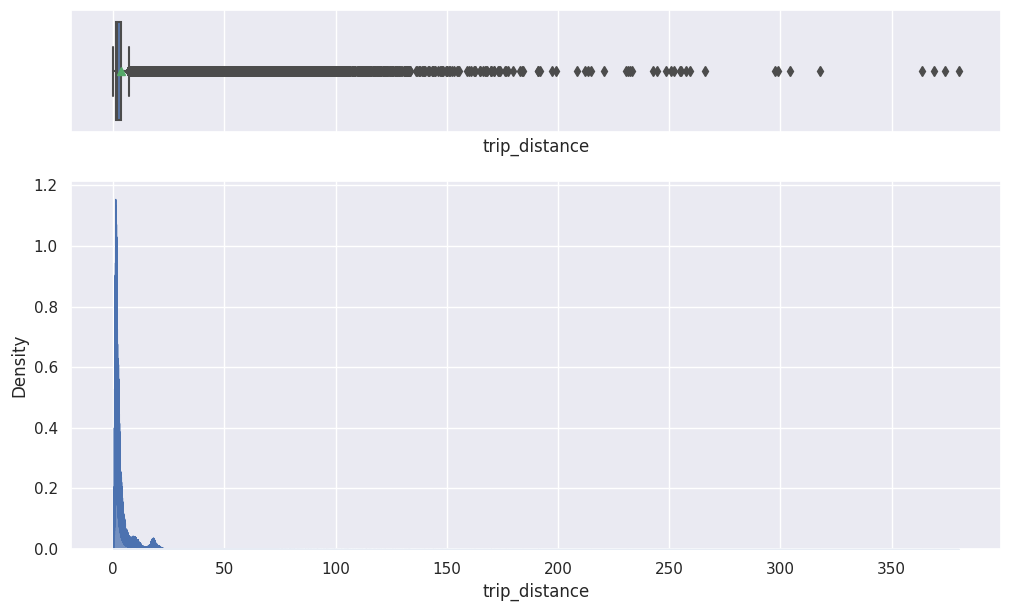

In [ ]:
hiplt(df_taxi,'trip_distance')

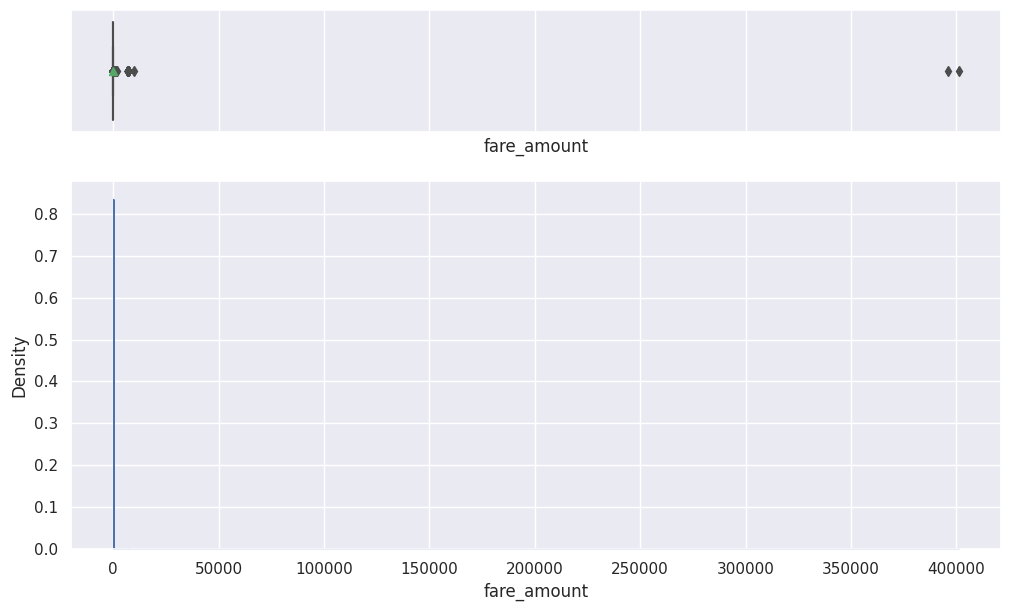

In [ ]:
hiplt(df_taxi,'fare_amount')

In [ ]:
df_taxi[df_taxi['fare_amount']>50000]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,pickup_hour,dropoff_hour,pickup_month,dropoff_month,pickup_mday,dropoff_mday,time_of_day_pickup,time_of_day_dropoff,duration,speed
index,,,,,,,,,,,,,,,,,,,,,
429859,1,2022-01-07 11:36:43,2022-01-07 11:47:12,1.0,3.3,1.0,N,107,140,4,...,11,11,1,1,7,7,Morning,Morning,629.0,18.887122
17467531,1,2022-06-11 09:47:33,2022-06-11 09:55:39,3.0,1.2,1.0,N,163,140,3,...,9,9,6,6,11,11,Morning,Morning,486.0,8.888889


In [ ]:
df_taxi.drop(index=df_taxi[df_taxi['fare_amount']>2000].index,inplace=True)

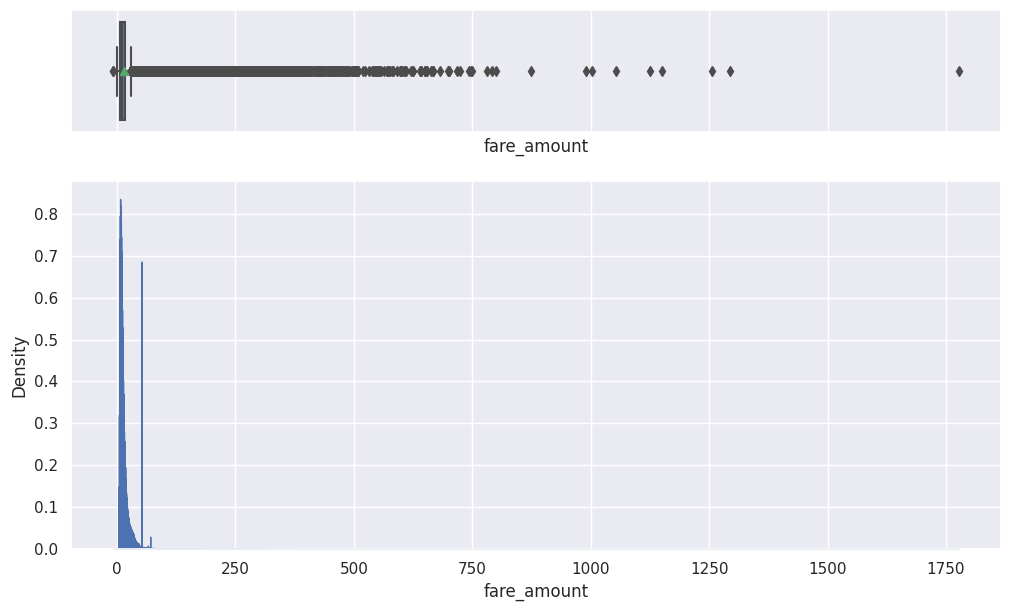

In [ ]:
hiplt(df_taxi,'fare_amount')

In [ ]:
df_taxi[df_taxi['fare_amount']>800]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,pickup_hour,dropoff_hour,pickup_month,dropoff_month,pickup_mday,dropoff_mday,time_of_day_pickup,time_of_day_dropoff,duration,speed
index,,,,,,,,,,,,,,,,,,,,,
6098385,2,2022-03-06 16:07:48,2022-03-06 22:20:57,1.0,363.670013,4.0,N,180,265,2,...,16,22,3,3,6,6,Evening,Late night,22389.0,58.475682
7011542,2,2022-03-15 03:29:05,2022-03-15 07:59:54,1.0,244.610001,4.0,N,162,265,2,...,3,7,3,3,15,15,Late night,Morning,16249.0,54.193858
9883148,2,2022-04-07 22:30:59,2022-04-08 04:22:41,1.0,266.200012,4.0,N,138,265,2,...,22,4,4,4,7,8,Late night,Late night,21102.0,45.413707
11006334,2,2022-04-17 17:09:11,2022-04-17 22:19:59,1.0,233.470001,4.0,N,141,141,2,...,17,22,4,4,17,17,Evening,Late night,18648.0,45.071429
12443997,2,2022-04-30 04:16:09,2022-04-30 07:25:37,1.0,172.889999,4.0,N,79,225,2,...,4,7,4,4,30,30,Late night,Morning,11368.0,54.750528
24567082,2,2022-08-16 23:07:49,2022-08-17 02:21:00,1.0,208.369995,4.0,N,132,265,2,...,23,2,8,8,16,17,Late night,Late night,11591.0,64.716761
24584730,2,2022-08-17 09:13:52,2022-08-17 13:14:22,3.0,230.740005,4.0,N,50,265,2,...,9,13,8,8,17,17,Morning,Afternoon,14430.0,57.565074
30526799,2,2022-10-12 07:00:43,2022-10-12 12:31:57,4.0,259.329987,4.0,N,39,265,2,...,7,12,10,10,12,12,Morning,Afternoon,19874.0,46.975342
34397981,2,2022-11-12 18:23:50,2022-11-12 22:13:15,1.0,214.720001,4.0,N,10,265,2,...,18,22,11,11,12,12,Evening,Late night,13765.0,56.156339


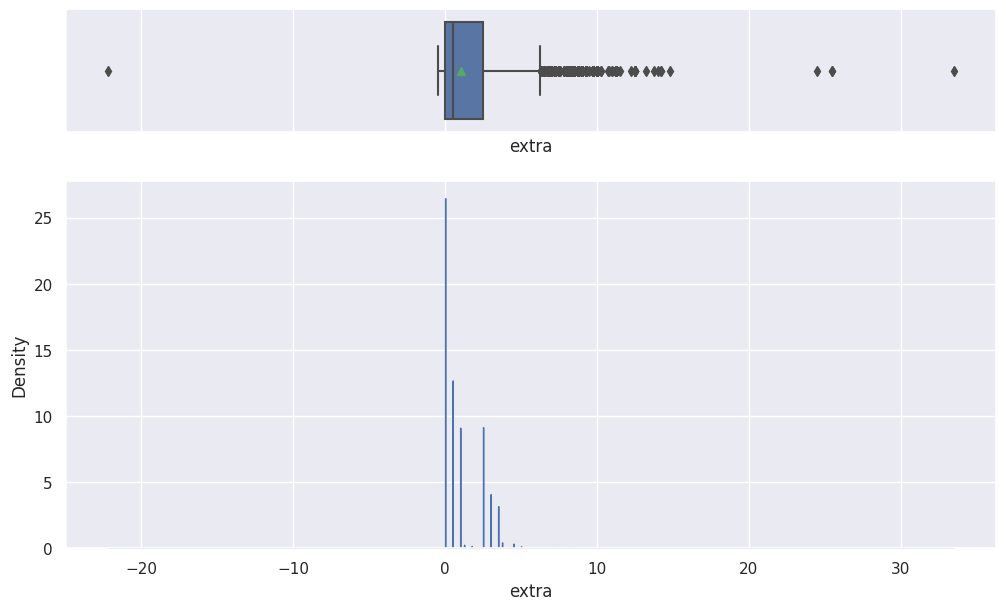

In [ ]:
hiplt(df_taxi,'extra')

In [ ]:
df_taxi[(df_taxi['extra'] >1) | (df_taxi['extra']<0.5)] 

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,pickup_hour,dropoff_hour,pickup_month,dropoff_month,pickup_mday,dropoff_mday,time_of_day_pickup,time_of_day_dropoff,duration,speed
index,,,,,,,,,,,,,,,,,,,,,
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.80,1.0,N,142,236,1,...,0,0,1,1,1,1,Late night,Late night,1069.0,12.797006
5,1,2022-01-01 00:40:15,2022-01-01 01:09:48,1.0,10.30,1.0,N,138,161,1,...,0,1,1,1,1,1,Late night,Late night,1773.0,20.913706
16,1,2022-01-01 00:33:52,2022-01-01 00:47:28,3.0,4.20,1.0,N,148,141,1,...,0,0,1,1,1,1,Late night,Late night,816.0,18.529411
17,1,2022-01-01 00:53:54,2022-01-01 01:05:20,2.0,2.20,1.0,N,237,107,1,...,0,1,1,1,1,1,Late night,Late night,686.0,11.545190
19,1,2022-01-01 00:35:50,2022-01-01 00:48:33,2.0,3.90,1.0,N,107,263,1,...,0,0,1,1,1,1,Late night,Late night,763.0,18.401049
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39529598,1,2022-12-31 23:04:03,2022-12-31 23:18:21,1.0,8.10,1.0,N,138,233,1,...,23,23,12,12,31,31,Late night,Late night,858.0,33.986016
39529613,1,2022-12-31 23:20:41,2022-12-31 23:38:09,1.0,9.00,1.0,N,132,77,1,...,23,23,12,12,31,31,Late night,Late night,1048.0,30.916031
39529624,2,2022-12-31 23:09:10,2022-12-31 23:43:04,4.0,21.41,2.0,N,132,239,1,...,23,23,12,12,31,31,Late night,Late night,2034.0,37.893805


In [ ]:
df_taxi.drop(index = df_taxi[(df_taxi['extra'] >17) | (df_taxi['extra']<0)].index, inplace=True)

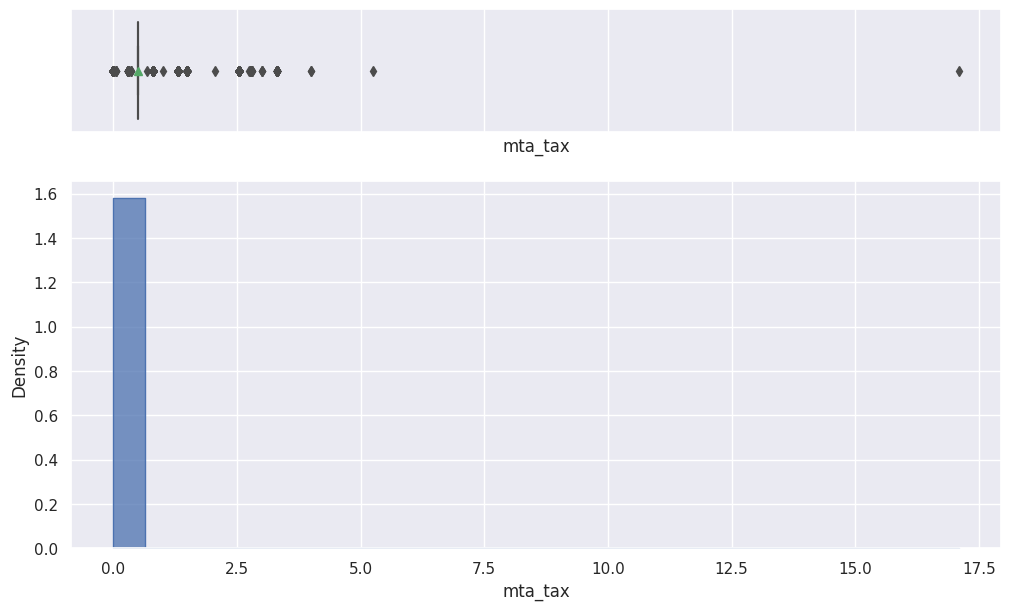

In [ ]:
hiplt(df_taxi,'mta_tax')

In [ ]:
df_taxi['mta_tax'].value_counts()

0.500000     36389541
0.000000       205797
0.799805         6821
2.539062          555
1.299805          250
1.500000          119
2.779297           84
3.300781           47
0.300049           37
0.049988            4
3.000000            3
2.800781            3
0.350098            3
4.000000            2
2.750000            1
2.050781            1
2.550781            1
17.093750           1
0.680176            1
1.000000            1
5.250000            1
Name: mta_tax, dtype: int64

In [ ]:
df_taxi[df_taxi['mta_tax']>0.5]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,pickup_hour,dropoff_hour,pickup_month,dropoff_month,pickup_mday,dropoff_mday,time_of_day_pickup,time_of_day_dropoff,duration,speed
index,,,,,,,,,,,,,,,,,,,,,
2262758,1,2022-01-30 12:00:53,2022-01-30 12:21:27,2.0,4.1,1.0,N,13,164,1,...,12,12,1,1,30,30,Afternoon,Afternoon,1234.0,11.961102
2607171,1,2022-02-02 17:57:14,2022-02-02 19:28:56,3.0,11.4,1.0,Y,79,4,1,...,17,19,2,2,2,2,Evening,Evening,5502.0,7.459106
2777241,1,2022-02-04 12:54:28,2022-02-04 12:58:37,1.0,0.6,1.0,N,239,142,1,...,12,12,2,2,4,4,Afternoon,Afternoon,249.0,8.674699
4540612,1,2022-02-21 14:02:25,2022-02-21 14:11:16,1.0,1.7,1.0,N,161,236,1,...,14,14,2,2,21,21,Afternoon,Afternoon,531.0,11.525424
4825554,1,2022-02-24 11:53:25,2022-02-24 12:09:21,1.0,10.2,1.0,N,140,138,1,...,11,12,2,2,24,24,Morning,Afternoon,956.0,38.410041
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39519159,1,2022-12-31 21:09:37,2022-12-31 21:17:54,1.0,1.5,1.0,N,68,142,1,...,21,21,12,12,31,31,Evening,Evening,497.0,10.865191
39519160,1,2022-12-31 21:46:19,2022-12-31 21:56:10,1.0,0.9,1.0,N,48,161,2,...,21,21,12,12,31,31,Evening,Evening,591.0,5.482233
39524038,1,2022-12-31 22:12:39,2022-12-31 22:24:16,1.0,1.3,1.0,N,107,90,1,...,22,22,12,12,31,31,Late night,Late night,697.0,6.714490


In [ ]:
df_taxi.drop(index=df_taxi[df_taxi['mta_tax']>0.5].index,inplace=True)

In [ ]:
df_taxi['mta_tax'].value_counts()

0.500000    36389541
0.000000      205797
0.300049          37
0.049988           4
0.350098           3
Name: mta_tax, dtype: int64

In [ ]:
df_taxi.drop(index=df_taxi[(df_taxi['mta_tax']==0.300049) | (df_taxi['mta_tax']==0.049988) | (df_taxi['mta_tax']==0.350098)].index,inplace=True)

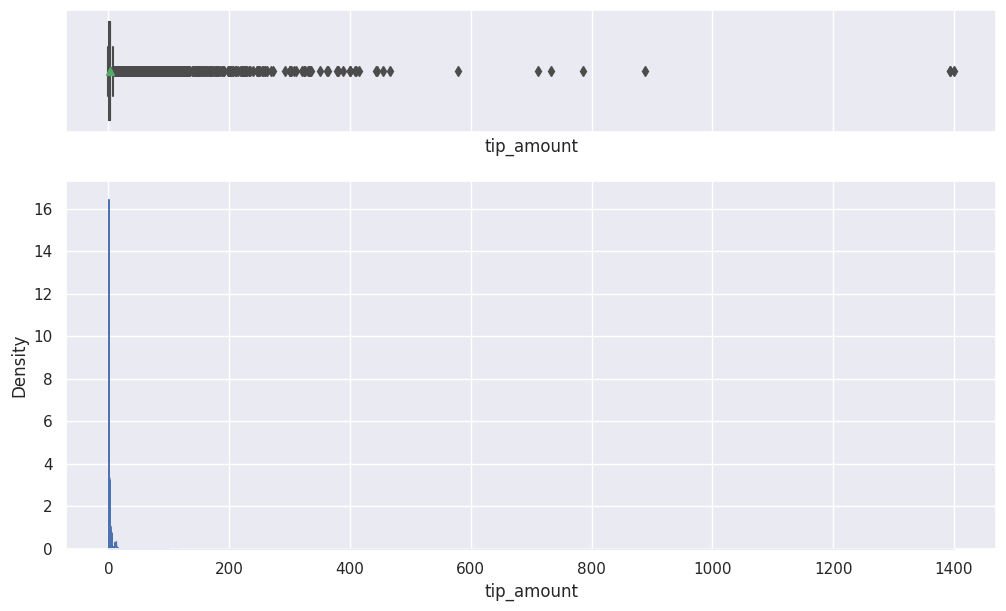

In [ ]:
hiplt(df_taxi,'tip_amount')

In [ ]:
df_taxi['fare_tip_ratio'] = df_taxi['fare_amount']/df_taxi['tip_amount']

In [ ]:
df_taxi.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,dropoff_hour,pickup_month,dropoff_month,pickup_mday,dropoff_mday,time_of_day_pickup,time_of_day_dropoff,duration,speed,fare_tip_ratio
index,,,,,,,,,,,,,,,,,,,,,
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.80,1.0,N,142,236,1,...,0,1,1,1,1,Late night,Late night,1069.0,12.797006,3.972178
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.10,1.0,N,236,42,1,...,0,1,1,1,1,Late night,Late night,504.0,14.999999,2.000000
2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,0.97,1.0,N,166,166,1,...,1,1,1,1,1,Late night,Late night,538.0,6.490707,4.261931
3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.0,1.09,1.0,N,114,68,2,...,0,1,1,1,1,Late night,Late night,602.0,6.518273,inf
4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.0,4.30,1.0,N,68,163,1,...,1,1,1,1,1,Late night,Late night,2252.0,6.873890,7.833333


In [ ]:
df_taxi[df_taxi['fare_tip_ratio'] < 1]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,dropoff_hour,pickup_month,dropoff_month,pickup_mday,dropoff_mday,time_of_day_pickup,time_of_day_dropoff,duration,speed,fare_tip_ratio
index,,,,,,,,,,,,,,,,,,,,,
323,1,2022-01-01 00:37:13,2022-01-01 00:44:46,1.0,1.90,1.0,N,50,90,1,...,0,1,1,1,1,Late night,Late night,453.0,15.099338,0.375000
460,2,2022-01-01 00:15:46,2022-01-01 00:17:41,2.0,0.60,1.0,N,249,68,1,...,0,1,1,1,1,Late night,Late night,115.0,18.782609,0.400000
603,2,2022-01-01 00:23:02,2022-01-01 00:28:20,1.0,0.75,1.0,N,158,246,1,...,0,1,1,1,1,Late night,Late night,318.0,8.490566,0.366667
905,1,2022-01-01 00:10:22,2022-01-01 00:15:53,2.0,1.20,1.0,N,79,137,1,...,0,1,1,1,1,Late night,Late night,331.0,13.051360,0.300000
1083,2,2022-01-01 00:22:50,2022-01-01 00:28:18,3.0,1.27,1.0,N,137,229,1,...,0,1,1,1,1,Late night,Late night,328.0,13.939024,0.650000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39526998,2,2022-12-31 23:46:31,2022-12-31 23:54:28,1.0,1.59,1.0,N,113,249,1,...,23,12,12,31,31,Late night,Late night,477.0,12.000000,0.666667
39527319,2,2022-12-31 23:51:52,2022-12-31 23:53:32,1.0,0.41,1.0,N,162,141,1,...,23,12,12,31,31,Late night,Late night,100.0,14.760000,0.880000
39527976,2,2022-12-31 23:49:03,2022-12-31 23:54:28,1.0,0.81,1.0,N,68,246,1,...,23,12,12,31,31,Late night,Late night,325.0,8.972308,0.600000


In [ ]:
df_taxi[df_taxi['tip_amount'] >= 200]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,dropoff_hour,pickup_month,dropoff_month,pickup_mday,dropoff_mday,time_of_day_pickup,time_of_day_dropoff,duration,speed,fare_tip_ratio
index,,,,,,,,,,,,,,,,,,,,,
347202,2,2022-01-06 08:52:49,2022-01-06 09:05:12,2.0,2.220000,1.0,N,234,50,1,...,9,1,1,6,6,Morning,Morning,743.0,10.756393,0.045096
349202,1,2022-01-06 09:03:11,2022-01-06 09:54:47,3.0,39.700001,5.0,N,132,265,1,...,9,1,1,6,6,Morning,Morning,3096.0,46.162792,0.000000
1035037,2,2022-01-15 02:27:19,2022-01-15 02:33:34,5.0,1.300000,1.0,N,79,232,1,...,2,1,1,15,15,Late night,Late night,375.0,12.480000,0.021452
1709127,2,2022-01-23 07:35:29,2022-01-23 08:10:12,1.0,2.310000,1.0,N,132,132,1,...,8,1,1,23,23,Morning,Morning,2083.0,3.992319,0.090000
1847360,2,2022-01-25 06:55:47,2022-01-25 07:03:37,1.0,1.880000,1.0,N,107,141,1,...,7,1,1,25,25,Morning,Morning,470.0,14.400000,0.040000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38592237,2,2022-12-20 21:05:10,2022-12-20 21:44:09,1.0,18.590000,2.0,N,132,144,1,...,21,12,12,20,20,Evening,Evening,2339.0,28.612228,0.216243
38921344,2,2022-12-24 10:27:03,2022-12-24 10:31:00,1.0,0.650000,1.0,N,143,143,1,...,10,12,12,24,24,Morning,Morning,237.0,9.873417,0.032500
39204532,1,2022-12-28 12:17:20,2022-12-28 12:37:21,2.0,2.100000,1.0,N,246,163,1,...,12,12,12,28,28,Afternoon,Afternoon,1201.0,6.294754,0.019833


In [ ]:
df_taxi.drop(index=df_taxi[df_taxi['tip_amount']>=200].index,inplace=True)

In [ ]:
df_taxi.reset_index(drop=True,inplace=True)

In [ ]:
df_taxi[df_taxi['fare_amount']==0]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,dropoff_hour,pickup_month,dropoff_month,pickup_mday,dropoff_mday,time_of_day_pickup,time_of_day_dropoff,duration,speed,fare_tip_ratio
4179,1,2022-01-01 01:16:16,2022-01-01 01:34:37,1.0,12.000000,5.0,N,132,138,4,...,1,1,1,1,1,Late night,Late night,1101.0,39.237057,NaN
10003,1,2022-01-01 02:03:52,2022-01-01 02:31:24,1.0,6.100000,5.0,N,234,265,2,...,2,1,1,1,1,Late night,Late night,1652.0,13.292978,NaN
11903,2,2022-01-01 03:42:11,2022-01-01 04:06:57,1.0,6.110000,1.0,N,100,179,2,...,4,1,1,1,1,Late night,Late night,1486.0,14.802154,NaN
23279,2,2022-01-01 11:58:15,2022-01-01 12:12:41,1.0,11.180000,1.0,N,132,138,2,...,12,1,1,1,1,Morning,Afternoon,866.0,46.475752,NaN
27080,2,2022-01-01 13:36:20,2022-01-01 13:38:40,1.0,0.790000,1.0,N,246,246,2,...,13,1,1,1,1,Afternoon,Afternoon,140.0,20.314286,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36470531,1,2022-12-30 14:18:07,2022-12-30 14:19:16,1.0,0.100000,5.0,N,161,163,4,...,14,12,12,30,30,Afternoon,Afternoon,69.0,5.217391,NaN
36479056,1,2022-12-30 16:15:19,2022-12-30 16:21:21,1.0,0.300000,1.0,N,170,137,1,...,16,12,12,30,30,Evening,Evening,362.0,2.983426,0.0
36496321,1,2022-12-30 19:47:46,2022-12-30 20:28:17,1.0,18.299999,5.0,N,229,265,4,...,20,12,12,30,30,Evening,Evening,2431.0,27.099958,NaN
36501266,1,2022-12-30 20:45:35,2022-12-30 20:46:45,1.0,0.200000,1.0,Y,70,138,4,...,20,12,12,30,30,Evening,Evening,70.0,10.285714,NaN


In [ ]:
df_taxi.drop(index=df_taxi[df_taxi['fare_amount']==0].index,inplace=True)

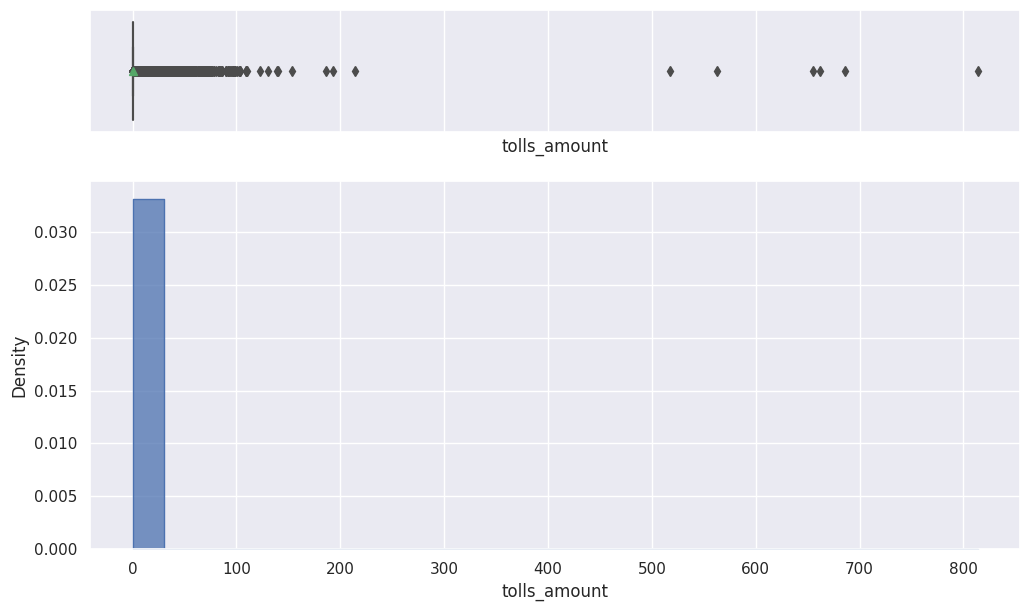

In [ ]:
hiplt(df_taxi,'tolls_amount')

In [ ]:
df_taxi[df_taxi['tolls_amount']>200]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,pickup_hour,dropoff_hour,pickup_month,dropoff_month,pickup_mday,dropoff_mday,time_of_day_pickup,time_of_day_dropoff,duration,speed
index,,,,,,,,,,,,,,,,,,,,,
12150977,1,2022-04-27 19:55:14,2022-04-27 20:28:30,4.0,17.900000,2.0,N,132,162,3,...,19,20,4,4,27,27,Evening,Evening,1996.0,32.284568
14595257,1,2022-05-17 22:45:07,2022-05-17 23:24:34,1.0,11.500000,1.0,N,234,228,3,...,22,23,5,5,17,17,Late night,Late night,2367.0,17.490494
15020311,1,2022-05-21 13:47:48,2022-05-21 14:05:47,1.0,2.400000,3.0,N,239,246,3,...,13,14,5,5,21,21,Afternoon,Afternoon,1079.0,8.007415
18857178,2,2022-06-23 14:10:16,2022-06-23 16:29:21,1.0,111.260002,5.0,N,222,265,1,...,14,16,6,6,23,23,Afternoon,Evening,8345.0,47.997125
21509262,1,2022-07-18 18:31:00,2022-07-18 19:08:54,1.0,17.000000,2.0,N,132,107,3,...,18,19,7,7,18,18,Evening,Evening,2274.0,26.912929
32692914,1,2022-10-30 08:26:12,2022-10-30 08:57:12,3.0,20.500000,3.0,N,238,1,2,...,8,8,10,10,30,30,Morning,Morning,1860.0,39.677419
35768225,1,2022-11-27 15:06:03,2022-11-27 15:59:13,1.0,17.000000,2.0,Y,234,132,3,...,15,15,11,11,27,27,Afternoon,Afternoon,3190.0,19.184953


In [ ]:
df_taxi.drop(index = df_taxi[df_taxi['tolls_amount']>300].index,inplace=True)

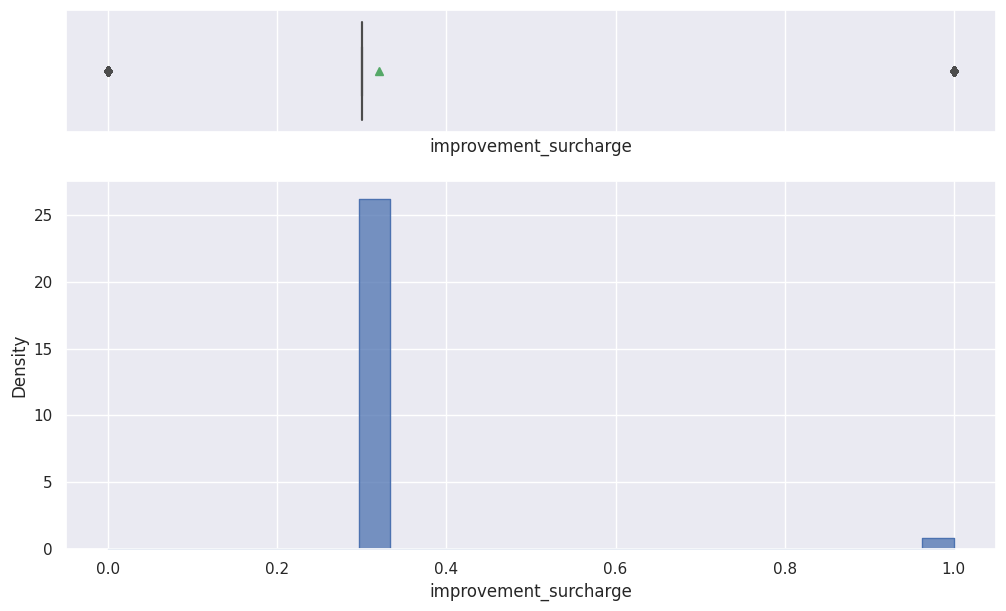

In [ ]:
hiplt(df_taxi,'improvement_surcharge')

In [ ]:
df_taxi['improvement_surcharge'].value_counts()

0.300049    35513325
1.000000     1076123
0.000000        2435
Name: improvement_surcharge, dtype: int64

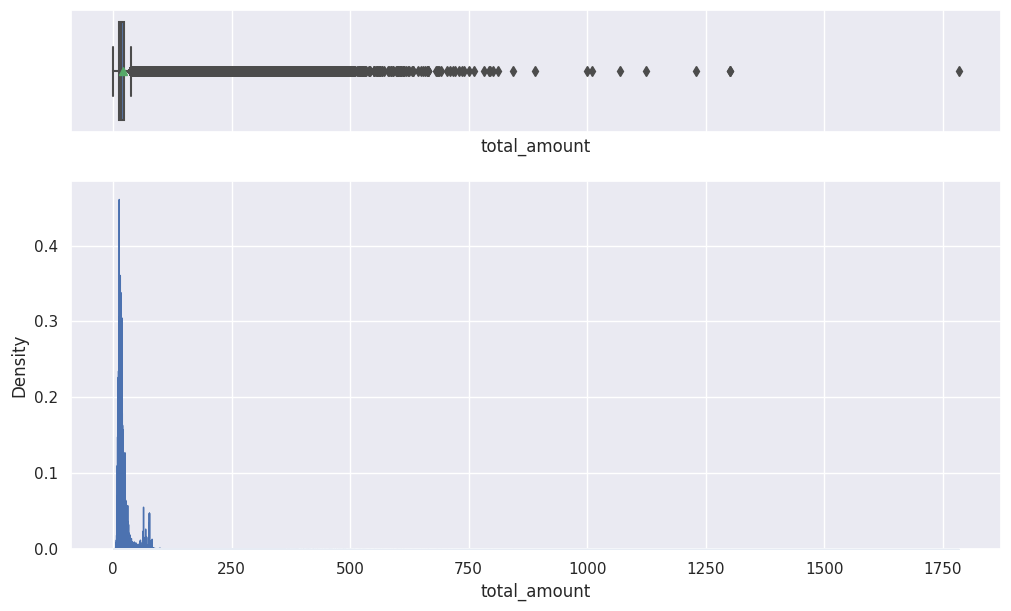

In [ ]:
hiplt(df_taxi,'total_amount')

In [ ]:
df_taxi[df_taxi['total_amount']>=1000]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,pickup_hour,dropoff_hour,pickup_month,dropoff_month,pickup_mday,dropoff_mday,time_of_day_pickup,time_of_day_dropoff,duration,speed
index,,,,,,,,,,,,,,,,,,,,,
6098385,2,2022-03-06 16:07:48,2022-03-06 22:20:57,1.0,363.670013,4.0,N,180,265,2,...,16,22,3,3,6,6,Evening,Late night,22389.0,58.475682
7011542,2,2022-03-15 03:29:05,2022-03-15 07:59:54,1.0,244.610001,4.0,N,162,265,2,...,3,7,3,3,15,15,Late night,Morning,16249.0,54.193858
9883148,2,2022-04-07 22:30:59,2022-04-08 04:22:41,1.0,266.200012,4.0,N,138,265,2,...,22,4,4,4,7,8,Late night,Late night,21102.0,45.413707
11006334,2,2022-04-17 17:09:11,2022-04-17 22:19:59,1.0,233.470001,4.0,N,141,141,2,...,17,22,4,4,17,17,Evening,Late night,18648.0,45.071429
24584730,2,2022-08-17 09:13:52,2022-08-17 13:14:22,3.0,230.740005,4.0,N,50,265,2,...,9,13,8,8,17,17,Morning,Afternoon,14430.0,57.565074
30526799,2,2022-10-12 07:00:43,2022-10-12 12:31:57,4.0,259.329987,4.0,N,39,265,2,...,7,12,10,10,12,12,Morning,Afternoon,19874.0,46.975342
34397981,2,2022-11-12 18:23:50,2022-11-12 22:13:15,1.0,214.720001,4.0,N,10,265,2,...,18,22,11,11,12,12,Evening,Late night,13765.0,56.156339


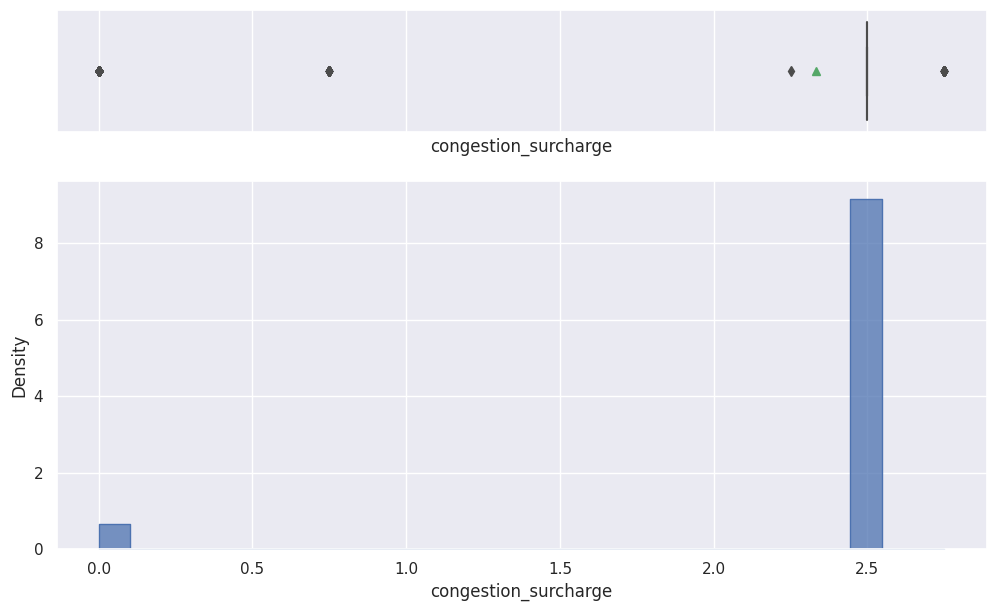

In [ ]:
hiplt(df_taxi,'congestion_surcharge')

In [ ]:
df_taxi['congestion_surcharge'].value_counts()

2.50    34124894
0.00     2466902
2.75          50
0.75          36
2.25           1
Name: congestion_surcharge, dtype: int64

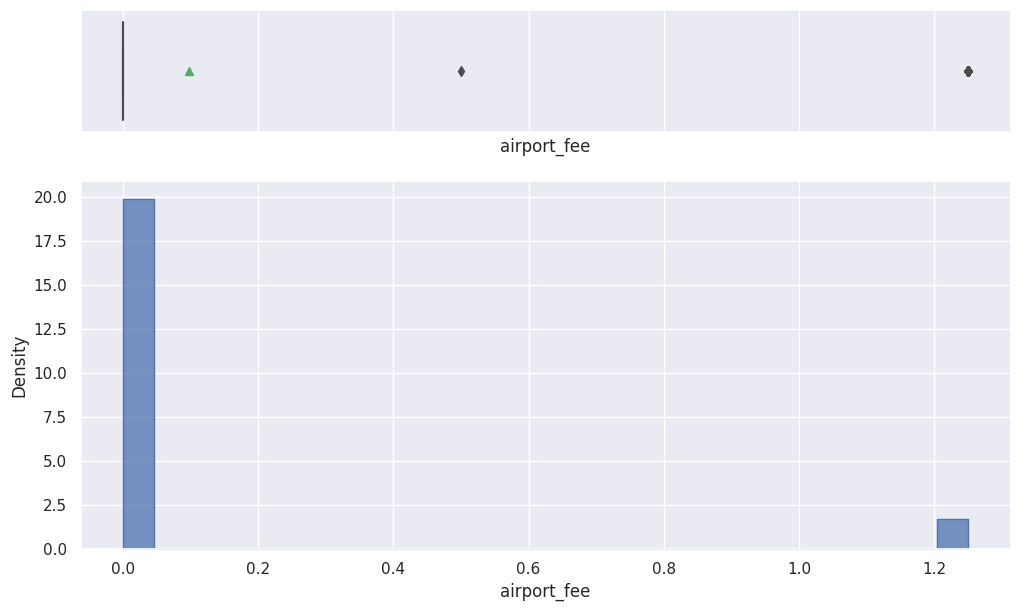

In [ ]:
hiplt(df_taxi,'airport_fee')

In [ ]:
df_taxi['airport_fee'].value_counts()

0.00    33706110
1.25     2885772
0.50           1
Name: airport_fee, dtype: int64

In [ ]:
df_taxi.drop(index = df_taxi[df_taxi['airport_fee'] == 0.50].index, inplace=True)

In [ ]:
df_taxi.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,pickup_hour,dropoff_hour,pickup_month,dropoff_month,pickup_mday,dropoff_mday,time_of_day_pickup,time_of_day_dropoff,duration,speed
index,,,,,,,,,,,,,,,,,,,,,
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.80,1.0,N,142,236,1,...,0,0,1,1,1,1,Late night,Late night,1069.0,12.797006
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.10,1.0,N,236,42,1,...,0,0,1,1,1,1,Late night,Late night,504.0,14.999999
2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,0.97,1.0,N,166,166,1,...,0,1,1,1,1,1,Late night,Late night,538.0,6.490707
3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.0,1.09,1.0,N,114,68,2,...,0,0,1,1,1,1,Late night,Late night,602.0,6.518273
4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.0,4.30,1.0,N,68,163,1,...,0,1,1,1,1,1,Late night,Late night,2252.0,6.873890


In [ ]:
df_taxi.tail()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,pickup_hour,dropoff_hour,pickup_month,dropoff_month,pickup_mday,dropoff_mday,time_of_day_pickup,time_of_day_dropoff,duration,speed
index,,,,,,,,,,,,,,,,,,,,,
39529630,2,2022-12-31 23:36:15,2022-12-31 23:52:36,1.0,4.02,1.0,N,233,7,1,...,23,23,12,12,31,31,Late night,Late night,981.0,14.752294
39529631,2,2022-12-31 23:09:34,2022-12-31 23:17:46,1.0,1.12,1.0,N,161,142,1,...,23,23,12,12,31,31,Late night,Late night,492.0,8.195122
39529632,2,2022-12-31 23:39:06,2022-12-31 23:51:55,1.0,1.81,1.0,N,161,141,1,...,23,23,12,12,31,31,Late night,Late night,769.0,8.473342
39529633,2,2022-12-31 23:09:37,2022-12-31 23:23:07,1.0,2.35,1.0,N,229,142,2,...,23,23,12,12,31,31,Late night,Late night,810.0,10.444444
39529634,2,2022-12-31 23:34:24,2022-12-31 23:40:52,1.0,1.06,1.0,N,236,263,1,...,23,23,12,12,31,31,Late night,Late night,388.0,9.835051


In [ ]:
df_taxi.reset_index(drop=True,inplace=True)

In [ ]:
df_taxi.shape

(36591882, 31)

In [ ]:
df_taxi.info() #info of the cleaned dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36591882 entries, 0 to 36591881
Data columns (total 31 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float32       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float32       
 11  extra                  float32       
 12  mta_tax                float32       
 13  tip_amount             float32       
 14  tolls_amount           float32       
 15  improvement_surcharge  float32       
 16  total_amount           float32       
 17  congestion_surcharge   float32       
 18  airport_fee         

In [ ]:
def conv_categorical(dataframe):
    for col in ['VendorID','passenger_count','store_and_fwd_flag','RatecodeID','payment_type','PULocationID','DOLocationID','airport_fee','pickup_day','dropoff_day','pickup_hour','dropoff_hour','pickup_month','dropoff_month','pickup_mday','dropoff_mday','time_of_day_pickup','time_of_day_dropoff']:
        dataframe[col] = dataframe[col].astype('category')

In [ ]:
conv_categorical(df_taxi)

In [ ]:
df_taxi = reduce_memory_usage(df_taxi)

Mem. usage decreased to 2024.04 Mb (34.1% reduction)


In [ ]:
df_taxi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36591882 entries, 0 to 36591881
Data columns (total 31 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               category      
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        category      
 4   trip_distance          float16       
 5   RatecodeID             category      
 6   store_and_fwd_flag     category      
 7   PULocationID           category      
 8   DOLocationID           category      
 9   payment_type           category      
 10  fare_amount            float16       
 11  extra                  float16       
 12  mta_tax                float16       
 13  tip_amount             float16       
 14  tolls_amount           float16       
 15  improvement_surcharge  float16       
 16  total_amount           float16       
 17  congestion_surcharge   float16       
 18  airport_fee         

In [ ]:
pip install fastparquet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 18.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 61.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 79.1 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.4.4
    Uninstalling pandas-1.4.4:
      Successfully uninstalled pandas-1.4.4


In [ ]:
df_taxi.to_parquet('/content/taxi_data_cleaned.parquet.gzip', engine='fastparquet', compression='gzip') # downloading the cleaned version 1 file as parquet.gzip file

### Geodata exploration of NYC zones

In [ ]:
pip install geopandas

In [ ]:
import geopandas as gpd
import pandas as pd

In [ ]:
df_taxi = pd.read_parquet("/content/taxi_data_cleaned.parquet.gzip")

In [ ]:
taxi_zones = gpd.read_file('/content/taxi_zones/taxi_zones.shp') # reading in zones sgape file into a dataframe

In [ ]:
taxi_zones.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19..."
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343..."
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.770 256767.698, 1026495.593 ..."
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20..."
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.310 144283.336, 936046.565 14..."


In [ ]:
taxi_zones.shape

(263, 7)

In [ ]:
taxi_zone_lookup = pd.read_csv('/content/taxi+_zone_lookup.csv') # additional file relating to zones

In [ ]:
taxi_zone_lookup.head()

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone


In [ ]:
taxi_zone_lookup.tail()

,LocationID,Borough,Zone,service_zone
260,261,Manhattan,World Trade Center,Yellow Zone
261,262,Manhattan,Yorkville East,Yellow Zone
262,263,Manhattan,Yorkville West,Yellow Zone
263,264,Unknown,NV,NaN
264,265,Unknown,NaN,NaN


In [ ]:
taxi_zone_lookup.shape

(265, 4)

In [ ]:
taxi_zones = taxi_zones.merge(taxi_zone_lookup, left_on='LocationID',right_on ='LocationID')

In [ ]:
taxi_zones.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,Borough,Zone,service_zone
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19...",EWR,Newark Airport,EWR
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343...",Queens,Jamaica Bay,Boro Zone
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.770 256767.698, 1026495.593 ...",Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20...",Manhattan,Alphabet City,Yellow Zone
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.310 144283.336, 936046.565 14...",Staten Island,Arden Heights,Boro Zone


In [ ]:
taxi_zones.shape

(263, 10)

In [ ]:
taxi_zones.drop(['Borough','Zone','OBJECTID'],axis=1,inplace=True)